In [10]:
pip install rdkit

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install toyplot==1.0.0

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for toyplot: filename=toyplot-1.0.0-py3-none-any.whl size=284105 sha256=315db77bbb29a9d2e7b9b120bcbf9e669a60fb0c91896af59dc00d93d2ff5a59
  Stored in directory: c:\users\matin\appdata\local\pip\cache\wheels\cc\9a\e7\79453c57f538b2fb2f02be85871b91e944bfd17744754b243c
Successfully built toyplot
  Attempting uninstall: toyplot
    Found existing installation: toyplot 2.0.0
    Uninstalling toyplot-2.0.0:
      Successfully uninstalled toyplot-2.0.0
Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install toytree toyplot

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- -------------------------

In [8]:
!pip install Bio

# تمرین ۱ - برگرداندن Id‌های توالی‌ها
تابعی بنویسید که فایلی شامل توالی‌هایی با فرمت Fasta را به عنوان ورودی دریافت کرده و سپس Id‌های توالی‌ها را برگرداند.

In [11]:
def sequence_names(filename):
    sequences = SeqIO.parse(filename, "fasta")
    records = [record.id for record in sequences]
    return records

# تحلیل ADMET با یادگیری عمیق در پایتون

# اینجاست که یادگیری عمیق (Deep Learning) و پایتون وارد میشوند.

ایده اصلی چیست؟
به جای انجام آزمایشهای گرانقیمت و زمانبر بر روی حیوانات یا در آزمایشگاه برای هر مولکول، ما به کامپیوتر میآموزیم که رابطه بین ساختار شیمیایی یک مولکول و ویژگیهای ADMET آن را پیشبینی کند.

چگونه کار میکند؟
دادههای آموزشی (Training Data): ما به مدل خود مقادیر زیادی داده میدهیم. این دادهها شامل:

ورودی (X): نمایندگیهای دیجیتالی از ساختار مولکولها (مثلاً به صورت SMILES، نمودار مولکولی، یا فیچرهای شیمیایی).

خروجی (Y): نتایج آزمایشگاهی واقعی برای ویژگیهای ADMET (مثلاً نیمهعمر متابولیک، سمیت کبدی، میزان جذب و غیره).

ساختن مدل (Model Building): از معماریهای شبکه عصبی خاصی استفاده میشود که برای دادههای شیمیایی مناسب هستند، مانند:

شبکههای عصبی کانولوشنی (CNNs): برای پردازش مولکول به عنوان یک "تصویر" یا از روی رشته SMILES.

شبکههای عصبی گراف (GNNs): که بهترین گزینه هستند زیرا میتوانند مولکول را به طور طبیعی به عنوان یک گراف مدلسازی کنند (اتمها به عنوان گرهها و پیوندها به عنوان یالها). این معماری میتواند الگوهای پیچیده در ساختار مولکول را یاد بگیرد.

ترانسفورماتورها (Transformers): که برای پردازش دنبالههایی مانند SMILES بسیار قدرتمند هستند.

پیشبینی (Prediction): پس از آموزش مدل، میتوانیم یک مولکول جدید (که هرگز توسط مدل دیده نشده) را به آن بدهیم و مدل پیشبینی میکند که این مولکول در بدن چگونه رفتار خواهد کرد (مثلاً "میزان جذب آن بالا است" یا "سمیت کبدی دارد").

یک مثال ساده از کد در پایتون:
(این یک مثال ساده برای درخت تصمیم است، اما ایده مشابهی برای مدلهای یادگیری عمیق وجود دارد)

In [16]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import RDLogger
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import warnings

class ADMETPredictor:
    def __init__(self, radius=2, n_bits=1024):
        self.radius = radius
        self.n_bits = n_bits
        self.model = None
        
    def _get_fingerprint(self, smiles):
        """تولید فیچر مورگان بدون هشدار"""
        # غیرفعال کردن موقت هشدارها
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            RDLogger.DisableLog('rdApp.warning')
            
            mol = Chem.MolFromSmiles(smiles)
            if mol is None:
                return None
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, self.radius, nBits=self.n_bits)
            
            RDLogger.EnableLog('rdApp.warning')
            return np.array(fp)
    
    def prepare_data(self, smiles_list, targets=None):
        """آماده‌سازی داده‌ها"""
        valid_smiles = []
        features = []
        valid_targets = []
        
        for i, sm in enumerate(smiles_list):
            fp = self._get_fingerprint(sm)
            if fp is not None:
                valid_smiles.append(sm)
                features.append(fp)
                if targets is not None:
                    valid_targets.append(targets[i])
        
        X = np.array(features)
        if targets is not None:
            y = np.array(valid_targets)
            return X, y, valid_smiles
        else:
            return X, valid_smiles
    
    def train(self, smiles_list, targets):
        """آموزش مدل"""
        X, y, valid_smiles = self.prepare_data(smiles_list, targets)
        
        print(f"تعداد نمونه‌های معتبر: {len(valid_smiles)}")
        print(f"تعداد ویژگی‌ها: {X.shape[1]}")
        
        self.model = RandomForestRegressor(n_estimators=100, random_state=42)
        self.model.fit(X, y)
        
        return valid_smiles
    
    def predict(self, smiles_list):
        """پیش‌بینی مقادیر ADMET"""
        if self.model is None:
            raise ValueError("مدل باید ابتدا آموزش داده شود!")
        
        X, valid_smiles = self.prepare_data(smiles_list)
        predictions = self.model.predict(X)
        
        return predictions, valid_smiles

# استفاده از کلاس بهبود یافته
def main():
    # داده‌های مثال
    smiles_list = ["CCO", "CCN", "CCC(=O)O", "C1=CC=CC=C1", "CC(C)C", 
                   "CCOC", "CCN(CC)CC", "c1ccncc1", "C1CCCCC1", "CC(=O)N"]
    admet_targets = [2.5, 1.8, 5.2, 3.0, 2.1, 2.8, 1.5, 3.2, 2.9, 4.1]
    
    # ایجاد و آموزش مدل
    predictor = ADMETPredictor()
    valid_smiles = predictor.train(smiles_list, admet_targets)
    
    # پیش‌بینی برای مولکول‌های جدید
    test_smiles = ["C1=CC=CC=C1", "CCO", "CCN"]
    predictions, valid_test_smiles = predictor.predict(test_smiles)
    
    for sm, pred in zip(valid_test_smiles, predictions):
        print(f"پیش‌بینی مقدار ADMET برای {sm}: {pred:.2f}")

if __name__ == "__main__":
    main()

تعداد نمونه‌های معتبر: 10
تعداد ویژگی‌ها: 1024
پیش‌بینی مقدار ADMET برای C1=CC=CC=C1: 2.97
پیش‌بینی مقدار ADMET برای CCO: 2.68
پیش‌بینی مقدار ADMET برای CCN: 2.16


In [18]:
# import libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. آماده کردن داده ها
smiles_list = [
    "CCO", "CCN", "CCC(=O)O", "C1=CC=CC=C1", "CCOC",
    "CCCO", "CC(=O)N", "C1CCCCC1", "CNC", "CCCC"
]

admet_targets = [2.5, 1.8, 5.2, 3.1, 2.2, 2.8, 4.5, 3.8, 1.5, 2.1]

# 2. ایجاد ویژگی‌های ساده بدون RDKit (شبیه‌سازی fingerprint)
def create_simple_features(smiles_list, n_features=50):
    """
    ایجاد ویژگی‌های ساده بر اساس طول SMILES و تعداد کاراکترهای خاص
    """
    features = []
    for smiles in smiles_list:
        # ویژگی‌های ساده
        feature_vector = [
            len(smiles),  # طول رشته SMILES
            smiles.count('C'),  # تعداد کربن
            smiles.count('O'),  # تعداد اکسیژن
            smiles.count('N'),  # تعداد نیتروژن
            smiles.count('='),  # تعداد باندهای دوگانه
            smiles.count('#'),  # تعداد باندهای سه گانه
            smiles.count('('),  # تعداد شاخه‌ها
            smiles.count('1'),  # وجود حلقه
            smiles.count('2'),
            smiles.count('3'),
        ]
        
        # تکمیل تا n_features با مقادیر تصادفی (در واقعیت باید ویژگی‌های بهتری استخراج کنید)
        while len(feature_vector) < n_features:
            feature_vector.append(hash(smiles + str(len(feature_vector))) % 10)
        
        features.append(feature_vector[:n_features])
    
    return np.array(features)

# ایجاد ویژگی‌ها
X = create_simple_features(smiles_list, n_features=50)
y = np.array(admet_targets)

print(f"شکل داده‌ها: {X.shape}")

# 3. استانداردسازی ویژگی‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. تقسیم داده به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. ساخت و آموزش مدل
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. ارزیابی مدل
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"خطای مطلق میانگین (MAE) روی داده تست: {mae:.2f}")

# 7. پیش بینی برای یک مولکول جدید
def predict_admet_simple(smiles, model, scaler, n_features=50):
    """
    پیش‌بینی مقدار ADMET برای یک SMILES داده شده
    """
    features = create_simple_features([smiles], n_features=n_features)
    features_scaled = scaler.transform(features)
    prediction = model.predict(features_scaled)
    return prediction[0]

# تست با مولکول‌های مختلف
test_molecules = [
    "C1=CC=CC=C1",  # بنزن
    "CCO",  # اتانول
    "CCN",  # اتیل آمین
]

print("\nپیش‌بینی‌های مدل:")
for sm in test_molecules:
    prediction = predict_admet_simple(sm, model, scaler)
    print(f"پیش بینی مقدار ADMET برای {sm}: {prediction:.2f}")

# 8. نمایش اهمیت ویژگی‌ها
feature_importance = model.feature_importances_
print(f"\nمیانگین اهمیت ویژگی‌ها: {np.mean(feature_importance):.6f}")
print(f"بیشترین اهمیت ویژگی: {np.max(feature_importance):.6f}")

شکل داده‌ها: (10, 50)
خطای مطلق میانگین (MAE) روی داده تست: 1.43

پیش‌بینی‌های مدل:
پیش بینی مقدار ADMET برای C1=CC=CC=C1: 3.38
پیش بینی مقدار ADMET برای CCO: 2.79
پیش بینی مقدار ADMET برای CCN: 3.32

میانگین اهمیت ویژگی‌ها: 0.020000
بیشترین اهمیت ویژگی: 0.143279


# استفاده از ژنراتور برای فایل‌های بزرگ

In [20]:
from Bio import SeqIO

def sequence_names_generator(filename):
    """
    یک ژنراتور برای خواندن شناسه‌ها از فایل FASTA.
    مناسب برای فایل‌های بسیار بزرگ.
    """
    try:
        with open(filename, "r") as file:
            for record in SeqIO.parse(file, "fasta"):
                yield record.id
    except FileNotFoundError:
        print(f"خطا: فایل '{filename}' یافت نشد.")
    except Exception as e:
        print(f"خطا در پردازش فایل: {e}")

# استفاده از ژنراتور
def get_sequence_names(filename):
    """برگرداندن لیست شناسه‌ها با استفاده از ژنراتور"""
    return list(sequence_names_generator(filename))

# روش استفاده از ژنراتور برای صرفه‌جویی در حافظه
def process_large_fasta(filename):
    """پردازش فایل‌های بزرگ بدون بارگذاری تمام داده در حافظه"""
    for seq_id in sequence_names_generator(filename):
        # پردازش هر شناسه
        print(f"پردازش شناسه: {seq_id}")

# بهبود کد اصلی با مدیریت خطا و مستندسازی

In [21]:
from Bio import SeqIO
import os

def sequence_length(filename):
    """
    یک دیکشنری از طول توالی‌ها را از فایل FASTA برمی‌گرداند.
    
    پارامترها:
    filename (str): مسیر فایل FASTA
    
    برمی‌گرداند:
    dict: دیکشنری با ساختار {sequence_id: length}
    
    مثال:
    >>> sequence_length("sequences.fasta")
    {'seq1': 150, 'seq2': 200}
    """
    if not os.path.exists(filename):
        raise FileNotFoundError(f"فایل '{filename}' یافت نشد.")
    
    try:
        with open(filename, "r") as file:
            return {record.id: len(record.seq) for record in SeqIO.parse(file, "fasta")}
    except Exception as e:
        raise Exception(f"خطا در پردازش فایل FASTA: {e}")

# تست تابع
if __name__ == "__main__":
    try:
        result = sequence_length("example.fasta")
        print(f"تعداد توالی‌ها: {len(result)}")
        for seq_id, length in result.items():
            print(f"{seq_id}: {length} bp")
    except Exception as e:
        print(e)

فایل 'example.fasta' یافت نشد.


# کلاس برای مدیریت حرفه‌ای‌تر

In [23]:
from Bio import SeqIO
import os
from typing import Dict, List, Tuple

class FastaLengthAnalyzer:
    """کلاس برای تحلیل طول توالی‌های FASTA"""
    
    def __init__(self, filename):
        self.filename = filename
        self._validate_file()
        self.lengths_dict = self._calculate_lengths()
    
    def _validate_file(self):
        """اعتبارسنجی فایل"""
        if not os.path.exists(self.filename):
            raise FileNotFoundError(f"فایل '{self.filename}' یافت نشد.")
        if not self.filename.lower().endswith(('.fasta', '.fa', '.fna')):
            print("⚠️  هشدار: پسوند فایل ممکن است برای FASTA استاندارد نباشد.")
    
    def _calculate_lengths(self) -> Dict[str, int]:
        """محاسبه طول توالی‌ها"""
        try:
            with open(self.filename, "r") as file:
                return {record.id: len(record.seq) for record in SeqIO.parse(file, "fasta")}
        except Exception as e:
            raise Exception(f"خطا در محاسبه طول توالی‌ها: {e}")
    
    def get_lengths_dict(self) -> Dict[str, int]:
        """دریافت دیکشنری طول‌ها"""
        return self.lengths_dict
    
    def get_stats(self) -> Dict[str, float]:
        """دریافت آمار توصیفی طول توالی‌ها"""
        if not self.lengths_dict:
            return {}
        
        lengths = list(self.lengths_dict.values())
        return {
            'count': len(lengths),
            'total_bp': sum(lengths),
            'min_length': min(lengths),
            'max_length': max(lengths),
            'average_length': sum(lengths) / len(lengths),
            'median_length': sorted(lengths)[len(lengths) // 2]
        }
    
    def find_sequences_by_length(self, min_len: int = 0, max_len: int = float('inf')) -> Dict[str, int]:
        """پیدا کردن توالی‌ها در بازه طولی مشخص"""
        return {seq_id: length for seq_id, length in self.lengths_dict.items() 
                if min_len <= length <= max_len}
    
    def export_to_file(self, output_file: str):
        """ذخیره نتایج در فایل"""
        try:
            with open(output_file, 'w') as f:
                f.write("Sequence_ID\tLength(bp)\n")
                for seq_id, length in self.lengths_dict.items():
                    f.write(f"{seq_id}\t{length}\n")
            print(f"نتایج در فایل '{output_file}' ذخیره شد.")
        except Exception as e:
            print(f"خطا در ذخیره فایل: {e}")

# استفاده از کلاس
if __name__ == "__main__":
    try:
        analyzer = FastaLengthAnalyzer("example.fasta")
        
        print("دیکشنری طول‌ها:")
        print(analyzer.get_lengths_dict())
        
        print("\nآمار توالی‌ها:")
        stats = analyzer.get_stats()
        for key, value in stats.items():
            print(f"{key}: {value}")
        
        print("\nتوالی‌های بلندتر از ۲۰۰ bp:")
        long_seqs = analyzer.find_sequences_by_length(min_len=200)
        print(long_seqs)
        
        # ذخیره نتایج
        analyzer.export_to_file("length_analysis.txt")
        
    except Exception as e:
        print(e)

فایل 'example.fasta' یافت نشد.


# تمرین ۳ - کپی توالی‌ها با طول بیشتر از ۱۰۰


In [24]:
from Bio import SeqIO
from pathlib import Path

def filter_seqs(input_file: str, output_file: str, min_length: int = 100) -> int:
    """
    توالی‌های با طول بیشتر از حد مشخص را در فایل جدید کپی می‌کند.
    
    پارامترها:
    input_file (str): مسیر فایل ورودی
    output_file (str): مسیر فایل خروجی
    min_length (int): حداقل طول توالی (پیش‌فرض: 100)
    
    برمی‌گرداند:
    int: تعداد توالی‌های کپی شده
    """
    try:
        # بررسی وجود فایل ورودی
        if not Path(input_file).exists():
            raise FileNotFoundError(f"فایل ورودی '{input_file}' یافت نشد.")
        
        records = []
        with open(input_file, "r") as infile:
            for record in SeqIO.parse(infile, "fasta"):
                if len(record.seq) > min_length:
                    records.append(record)
        
        # نوشتن در فایل خروجی فقط اگر توالی‌ای وجود داشته باشد
        if records:
            with open(output_file, "w") as outfile:
                SeqIO.write(records, outfile, "fasta")
        
        print(f"تعداد {len(records)} توالی با طول بیشتر از {min_length} در '{output_file}' ذخیره شد.")
        return len(records)
        
    except Exception as e:
        print(f"خطا: {e}")
        return 0

# استفاده از تابع
filter_seqs("input.fasta", "output.fasta", 100)

خطا: فایل ورودی 'input.fasta' یافت نشد.


0

# تمرین ۴ - برگرداندن Reverse_complement


In [25]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from typing import Union

def rc(dna_seq: Union[Seq, str, SeqRecord]) -> Seq:
    """
    محاسبه مکمل معکوس توالی DNA
    
    پارامترها:
    dna_seq (Seq, str, SeqRecord): توالی DNA ورودی
    
    برمی‌گرداند:
    Seq: توالی مکمل معکوس
    """
    try:
        if isinstance(dna_seq, SeqRecord):
            return dna_seq.seq.reverse_complement()
        elif isinstance(dna_seq, str):
            return Seq(dna_seq).reverse_complement()
        elif isinstance(dna_seq, Seq):
            return dna_seq.reverse_complement()
        else:
            raise TypeError("نوع داده ورودی باید Seq, str یا SeqRecord باشد.")
    except Exception as e:
        raise ValueError(f"خطا در محاسبه مکمل معکوس: {e}")

# تست تابع
if __name__ == "__main__":
    dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")
    result = rc(dna)
    print(f"توالی اصلی: {dna}")
    print(f"مکمل معکوس: {result}")

توالی اصلی: ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
مکمل معکوس: CTATCGGGCACCCTTTCAGCGGCCCATTACAATGGCCAT


# تمرین ۵ - اعمال تابع بر روی هر رکورد فایل

In [84]:
from Bio import SeqIO
from typing import Callable, List, Any
import pathlib

def apply_seqio(filename: str, func: Callable, format: str = "fasta") -> List[Any]:
    """
    اعمال یک تابع بر روی تمام رکوردهای فایل زیستی
    
    پارامترها:
    filename (str): مسیر فایل
    func (Callable): تابعی که بر روی هر رکورد اعمال می‌شود
    format (str): فرمت فایل (پیش‌فرض: fasta)
    
    برمی‌گرداند:
    List[Any]: لیست نتایج اعمال تابع
    """
    if not pathlib.Path(filename).exists():
        raise FileNotFoundError(f"فایل '{filename}' یافت نشد.")
    
    try:
        with open(filename, "r") as file_handle:
            return [func(record) for record in SeqIO.parse(file_handle, format)]
    except Exception as e:
        raise Exception(f"خطا در پردازش فایل: {e}")

# مثال استفاده
def get_sequence_info(record):
    """تابع نمونه برای استخراج اطلاعات از هر رکورد"""
    return {
        'id': record.id,
        'length': len(record.seq),
        'description': record.description
    }

# استفاده از تابع
results = apply_seqio("sequences.fasta", get_sequence_info)
for result in results:
    print(result)

FileNotFoundError: فایل 'sequences.fasta' یافت نشد.

# تمرین ۵ - اعمال تابع بر روی هر رکورد فایل
تابعی بنویسید که یک تابع را بر روی هر رکورد فایل اعمال کند.

In [82]:

def apply_seqio(filename, f, kind):
    with open(filename) as fh:
        return  map(f, SeqIO.parse(fh, kind))

# تمرین ۶ - بهبود نمایش خروجی همترازی


In [31]:
from Bio import SeqIO
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from typing import Callable, List, Any, Dict, Union
import pathlib

def apply_seqio(filename: str, func: Callable, format: str = "fasta") -> List[Any]:
    """
    Apply a function to all records in a biological file
    
    Parameters:
    filename (str): file path
    func (Callable): function to apply to each record
    format (str): file format (default: fasta)
    
    Returns:
    List[Any]: list of function results
    """
    if not pathlib.Path(filename).exists():
        raise FileNotFoundError(f"File '{filename}' not found.")
    
    try:
        with open(filename, "r", encoding='utf-8') as file_handle:
            return [func(record) for record in SeqIO.parse(file_handle, format)]
    except Exception as e:
        raise Exception(f"Error processing file: {e}")

# Example usage
def get_sequence_info(record) -> Dict[str, Union[str, int]]:
    """Sample function to extract information from each record"""
    return {
        'id': record.id,
        'length': len(record.seq),
        'description': record.description,
        'sequence': str(record.seq)[:50] + "..." if len(record.seq) > 50 else str(record.seq)
    }

def count_sequence_gc(record) -> Dict[str, Union[str, float]]:
    """Function to calculate GC percentage"""
    seq = str(record.seq)
    gc_count = seq.count('G') + seq.count('C')
    gc_percent = (gc_count / len(seq)) * 100 if len(seq) > 0 else 0
    
    return {
        'id': record.id,
        'length': len(seq),
        'gc_percent': round(gc_percent, 2)
    }

# Use the function
try:
    # If sequences.fasta file exists
    results = apply_seqio("sequences.fasta", get_sequence_info)
    for result in results:
        print(result)
except FileNotFoundError:
    print("File sequences.fasta not found. Creating sample data...")
    
    # Create sample data without Persian characters
    sample_data = """>seq1 Sample sequence 1
ACCGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGT
>seq2 Sample sequence 2
ACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGT
>seq3 Sample sequence 3
ACGACGACGACGACGACGACGACGACGACGACGACGACGACGACG"""
    
    # Write with UTF-8 encoding
    with open("sample_sequences.fasta", "w", encoding='utf-8') as f:
        f.write(sample_data)
    
    print("Sample file created: sample_sequences.fasta")
    
    # Test with sample file
    results = apply_seqio("sample_sequences.fasta", get_sequence_info)
    print("\nResults for sample file:")
    for result in results:
        print(result)
    
    print("\n" + "="*50)
    print("GC content calculation:")
    gc_results = apply_seqio("sample_sequences.fasta", count_sequence_gc)
    for result in gc_results:
        print(result)

def show_alignments(seq1: str, seq2: str, alignment_type: str = "global") -> None:
    """
    Display formatted alignments
    
    Parameters:
    seq1 (str): first sequence
    seq2 (str): second sequence
    alignment_type (str): alignment type (global, local, etc.)
    """
    # Convert alignment name to pairwise2 format
    alignment_map = {
        "global": "globalms",
        "local": "localms",
        "globalxx": "globalxx"
    }
    
    actual_alignment_type = alignment_map.get(alignment_type, alignment_type)
    
    try:
        # Set appropriate parameters for different alignment types
        if actual_alignment_type == "globalms":
            alignments = pairwise2.align.globalms(seq1, seq2, 2, -1, -0.5, -0.1)
        elif actual_alignment_type == "localms":
            alignments = pairwise2.align.localms(seq1, seq2, 2, -1, -0.5, -0.1)
        else:
            # Use getattr for other types
            align_func = getattr(pairwise2.align, actual_alignment_type)
            alignments = align_func(seq1, seq2)
        
        print(f"\nAlignment of '{seq1}' and '{seq2}' (type: {alignment_type}):")
        print("=" * 60)
        
        if not alignments:
            print("No alignments found.")
            return
        
        for i, alignment in enumerate(alignments[:3], 1):  # Show only first 3 alignments
            print(f"\nAlignment #{i} (score: {alignment.score}):")
            print(format_alignment(*alignment))
        
        print(f"\nTotal alignments found: {len(alignments)}")
        
    except AttributeError:
        print(f"Error: Alignment type '{alignment_type}' not supported.")
    except Exception as e:
        print(f"Error in alignment: {e}")

def compare_multiple_sequences(sequences: List[str], sequence_names: List[str] = None) -> None:
    """
    Compare multiple sequences with each other
    """
    if sequence_names is None:
        sequence_names = [f"Seq{i+1}" for i in range(len(sequences))]
    
    if len(sequences) != len(sequence_names):
        raise ValueError("Number of sequences and names must be equal")
    
    print("\n" + "="*60)
    print("Multiple Sequence Comparison")
    print("="*60)
    
    for i in range(len(sequences)):
        for j in range(i + 1, len(sequences)):
            print(f"\nComparing {sequence_names[i]} with {sequence_names[j]}:")
            show_alignments(sequences[i], sequences[j], "global")

# Test alignment functions
print("\n" + "="*60)
print("Alignment Functions Test")
print("="*60)

# Test 1: Simple alignment
show_alignments("ACCGT", "ACG", "global")

# Test 2: Alignment with longer sequences
seq1 = "ACCGTACGTACGT"
seq2 = "ACGTACGT"
show_alignments(seq1, seq2, "global")

# Test 3: Local alignment
show_alignments("ACCGTACGT", "ACGT", "local")

# Test 4: Multiple comparison
sequences = ["ACCGT", "ACGT", "ACGGT", "ACT"]
sequence_names = ["Sequence_A", "Sequence_B", "Sequence_C", "Sequence_D"]
compare_multiple_sequences(sequences, sequence_names)

# Helper function to read sequences from file and perform alignment
def align_sequences_from_file(filename: str, seq1_id: str, seq2_id: str, format: str = "fasta") -> None:
    """
    Perform alignment between two specific sequences from file
    """
    try:
        records = list(SeqIO.parse(filename, format))
        seq1 = None
        seq2 = None
        
        for record in records:
            if record.id == seq1_id:
                seq1 = str(record.seq)
            elif record.id == seq2_id:
                seq2 = str(record.seq)
        
        if seq1 and seq2:
            print(f"\nAlignment between {seq1_id} and {seq2_id}:")
            show_alignments(seq1, seq2, "global")
        else:
            print("One or both sequences not found.")
            
    except FileNotFoundError:
        print(f"File {filename} not found.")
    except Exception as e:
        print(f"Error: {e}")

# Test alignment from file (if file exists)
try:
    align_sequences_from_file("sample_sequences.fasta", "seq1", "seq2")
except:
    pass

# Additional utility function
def create_sample_fasta(filename: str = "sample_sequences.fasta") -> None:
    """
    Create a sample FASTA file for testing
    """
    sample_data = """>seq1 Protein kinase domain
MSTAVLENPGLSSRQRKQRSLGSASSGPGTAGALGGPGTPGGPQPAGGAYGPPGPPGPPGPSGPPGPP
>seq2 DNA binding protein
MKQSTIALALLPLLFTPVTKARTPEMPVLENRAAVGDGPGGNYWTLDPGTSCNLLYPNGTAVQNITV
>seq3 Membrane transporter
MALRKGGLGGATALLLLLLHWVSQEELPREYINLLKSRKQEYEKYAADLKKKDVAFVKSPLSPILNY
>seq4 Enzyme catalytic subunit
MGSGSSRPRRLLLLLLVLPALVAGSWGQRVLVVGDGQGQYHLYWMDLAAQKLPDDVTKVVMTLHQYF
>seq5 Regulatory protein
MAAAAAVGAGGGGGGSSSSSSSSCCCCCCCCCPPPPPPPPVVVVVVVVVLLLLLLLLQQQQQQQQQQ"""
    
    with open(filename, "w", encoding='utf-8') as f:
        f.write(sample_data)
    print(f"Sample FASTA file created: {filename}")

# Create a more comprehensive sample file
create_sample_fasta()

# Test with the new sample file
print("\n" + "="*60)
print("Testing with comprehensive sample file")
print("="*60)

results = apply_seqio("sample_sequences.fasta", get_sequence_info)
for result in results:
    print(result)

File sequences.fasta not found. Creating sample data...
Sample file created: sample_sequences.fasta

Results for sample file:
{'id': 'seq1', 'length': 45, 'description': 'seq1 Sample sequence 1', 'sequence': 'ACCGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGT'}
{'id': 'seq2', 'length': 48, 'description': 'seq2 Sample sequence 2', 'sequence': 'ACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGT'}
{'id': 'seq3', 'length': 45, 'description': 'seq3 Sample sequence 3', 'sequence': 'ACGACGACGACGACGACGACGACGACGACGACGACGACGACGACG'}

GC content calculation:
{'id': 'seq1', 'length': 45, 'gc_percent': 51.11}
{'id': 'seq2', 'length': 48, 'gc_percent': 50.0}
{'id': 'seq3', 'length': 45, 'gc_percent': 66.67}

Alignment Functions Test

Alignment of 'ACCGT' and 'ACG' (type: global):

Alignment #1 (score: 5.0):
ACCGT
| || 
A-CG-
  Score=5


Alignment #2 (score: 5.0):
ACCGT
|| | 
AC-G-
  Score=5


Total alignments found: 2

Alignment of 'ACCGTACGTACGT' and 'ACGTACGT' (type: global):

Alignment #1 (score: 15.1):

# تمرین ۶ - بهبود نمایش خروجی همترازی


In [32]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

def show_alignments(seq1: str, seq2: str, alignment_type: str = "globalxx"):
    """
    نمایش خوانا و فرمت‌بندی شده همترازی‌ها
    """
    alignments = getattr(pairwise2.align, alignment_type)(seq1, seq2)
    
    print(f"همترازی '{seq1}' و '{seq2}':")
    print("=" * 50)
    
    for i, alignment in enumerate(alignments, 1):
        print(f"\nهمترازی #{i}:")
        print(format_alignment(*alignment))
    
    print(f"\nتعداد همترازی‌های یافت شده: {len(alignments)}")

# تست
show_alignments("ACCGT", "ACG")

همترازی 'ACCGT' و 'ACG':

همترازی #1:
ACCGT
| || 
A-CG-
  Score=3


همترازی #2:
ACCGT
|| | 
AC-G-
  Score=3


تعداد همترازی‌های یافت شده: 2


# تمرین ۷ - همترازی با ماتریس امتیازدهی


In [83]:
from Bio.Align import substitution_matrices
from Bio import pairwise2

def show_matrix_alignments(seq1: str, seq2: str, matrix_name: str = "BLOSUM62"):
    """
    نمایش همترازی با ماتریس امتیازدهی خاص
    """
    try:
        matrix = substitution_matrices.load(matrix_name)
        alignments = pairwise2.align.globaldx(seq1, seq2, matrix)
        
        print(f"همترازی با ماتریس {matrix_name}:")
        print(f"'{seq1}' و '{seq2}'")
        print("=" * 40)
        
        for i, alignment in enumerate(alignments, 1):
            print(f"\nهمترازی #{i}:")
            print(pairwise2.format_alignment(*alignment))
            
    except Exception as e:
        print(f"خطا: {e}")

# تست
show_matrix_alignments("KEVLA", "EVL")

همترازی با ماتریس BLOSUM62:
'KEVLA' و 'EVL'

همترازی #1:
KEVLA
 ||| 
-EVL-
  Score=13



# تمرین ۸ - همترازی با تابع جریمه فاصله سفارشی


In [34]:
from Bio import pairwise2
from math import log

def custom_gap_penalty(x: int, y: int) -> float:
    """
    تابع سفارشی جریمه فاصله
    """
    if y == 0:  # بدون فاصله
        return 0
    elif y == 1:  # جریمه باز کردن فاصله
        return -2
    return -(2 + y/4.0 + log(y)/2.0)

def show_custom_alignments(seq1: str, seq2: str, match: int = 5, mismatch: int = -4):
    """
    نمایش همترازی با پارامترهای سفارشی
    """
    alignments = pairwise2.align.globalmc(
        seq1, seq2, 
        match, mismatch,
        custom_gap_penalty, 
        custom_gap_penalty
    )
    
    print(f"همترازی سفارشی:")
    print(f"'{seq1}' و '{seq2}'")
    print(f"امتیاز تطابق: {match}, عدم تطابق: {mismatch}")
    print("=" * 40)
    
    for i, alignment in enumerate(alignments, 1):
        print(f"\nهمترازی #{i}:")
        # فرمت سفارشی برای نمایش بهتر
        aligned_seqA = alignment.seqA
        aligned_seqB = alignment.seqB
        score = alignment.score
        
        print(f"توالی A: {aligned_seqA}")
        print(f"توالی B: {aligned_seqB}")
        print(f"امتیاز: {score:.1f}")
        print("-" * 30)

# تست
show_custom_alignments("ACCCCCGT", "ACG")

همترازی سفارشی:
'ACCCCCGT' و 'ACG'
امتیاز تطابق: 5, عدم تطابق: -4

همترازی #1:
توالی A: ACCCCCGT
توالی B: A----CG-
امتیاز: 9.3
------------------------------

همترازی #2:
توالی A: ACCCCCGT
توالی B: AC----G-
امتیاز: 9.3
------------------------------


# تمرین ۹ - خواندن فایل Stockholm با مدیریت خطا


In [36]:
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment
import pathlib

def read_stockholm(filename: str) -> MultipleSeqAlignment:
    """
    خواندن فایل Stockholm با مدیریت خطا
    """
    try:
        if not pathlib.Path(filename).exists():
            raise FileNotFoundError(f"فایل '{filename}' یافت نشد.")
        
        if not filename.lower().endswith(('.sth', '.stockholm', '.sto')):
            print("⚠️  هشدار: پسوند فایل ممکن است برای فرمت Stockholm استاندارد نباشد.")
        
        alignment = AlignIO.read(filename, "stockholm")
        print(f"فایل Stockholm با موفقیت خوانده شد.")
        print(f"تعداد توالی‌ها: {len(alignment)}")
        print(f"طول همترازی: {alignment.get_alignment_length()}")
        
        return alignment
        
    except Exception as e:
        print(f"خطا در خواندن فایل Stockholm: {e}")
        return None

# استفاده
alignment = read_stockholm("alignment.sth")
if alignment:
    print(alignment)

خطا در خواندن فایل Stockholm: فایل 'alignment.sth' یافت نشد.


In [37]:
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import pathlib

def read_stockholm(filename: str) -> MultipleSeqAlignment:
    """
    خواندن فایل Stockholm با مدیریت خطا
    """
    try:
        if not pathlib.Path(filename).exists():
            raise FileNotFoundError(f"فایل '{filename}' یافت نشد.")
        
        if not filename.lower().endswith(('.sth', '.stockholm', '.sto')):
            print("⚠️  هشدار: پسوند فایل ممکن است برای فرمت Stockholm استاندارد نباشد.")
        
        alignment = AlignIO.read(filename, "stockholm")
        print(f"فایل Stockholm با موفقیت خوانده شد.")
        print(f"تعداد توالی‌ها: {len(alignment)}")
        print(f"طول همترازی: {alignment.get_alignment_length()}")
        
        return alignment
        
    except Exception as e:
        print(f"خطا در خواندن فایل Stockholm: {e}")
        return None

def create_sample_stockholm(filename: str = "sample_alignment.sth") -> None:
    """
    ایجاد یک فایل Stockholm نمونه برای تست
    """
    sample_data = """# STOCKHOLM 1.0

seq1    ACCGTACGTACGTACGT
seq2    AC-GTACGTACGTACGT  
seq3    ACCGTAC-TACGTACGT
seq4    ACCGTACGTAC-TACGT
//
"""
    with open(filename, "w", encoding='utf-8') as f:
        f.write(sample_data)
    print(f"فایل Stockholm نمونه ایجاد شد: {filename}")

def analyze_alignment(alignment: MultipleSeqAlignment) -> None:
    """
    آنالیز همترازی و نمایش اطلاعات مفید
    """
    if alignment is None:
        print("همترازی معتبری برای آنالیز وجود ندارد.")
        return
    
    print("\n" + "="*50)
    print("آنالیز همترازی")
    print("="*50)
    
    print(f"تعداد توالی‌ها: {len(alignment)}")
    print(f"طول همترازی: {alignment.get_alignment_length()}")
    
    # نمایش شناسه توالی‌ها
    print("\nشناسه توالی‌ها:")
    for i, record in enumerate(alignment):
        print(f"  {i+1}. {record.id}")
    
    # محاسبه درصد گپ
    total_positions = len(alignment) * alignment.get_alignment_length()
    gap_count = sum(str(record.seq).count('-') for record in alignment)
    gap_percentage = (gap_count / total_positions) * 100 if total_positions > 0 else 0
    
    print(f"\nتعداد گپ‌ها: {gap_count}")
    print(f"درصد گپ‌ها: {gap_percentage:.2f}%")
    
    # نمایش بخشی از همترازی
    print(f"\nنمایش بخشی از همترازی (۱۰ موقعیت اول):")
    for record in alignment:
        print(f"{record.id:10} {str(record.seq)[:10]}")

# تست تابع
try:
    # سعی در خواندن فایل اصلی
    alignment = read_stockholm("alignment.sth")
    if alignment:
        analyze_alignment(alignment)
    else:
        print("فایل alignment.sth یافت نشد. ایجاد فایل نمونه...")
        create_sample_stockholm()
        
        # تست با فایل نمونه
        alignment = read_stockholm("sample_alignment.sth")
        if alignment:
            analyze_alignment(alignment)
            
except Exception as e:
    print(f"خطا در اجرای برنامه: {e}")

# تابع پیشرفته‌تر برای کار با فایل‌های Stockholm
def read_stockholm_with_metadata(filename: str) -> dict:
    """
    خواندن فایل Stockholm همراه با متادیتا
    """
    try:
        if not pathlib.Path(filename).exists():
            raise FileNotFoundError(f"فایل '{filename}' یافت نشد.")
        
        alignment = AlignIO.read(filename, "stockholm")
        
        # خواندن متادیتا از فایل
        metadata = {}
        with open(filename, 'r', encoding='utf-8') as f:
            lines = f.readlines()
            for line in lines:
                line = line.strip()
                if line.startswith('#=GF'):
                    parts = line.split()
                    if len(parts) >= 3:
                        key = parts[1]
                        value = ' '.join(parts[2:])
                        if key not in metadata:
                            metadata[key] = []
                        metadata[key].append(value)
        
        result = {
            'alignment': alignment,
            'metadata': metadata,
            'num_sequences': len(alignment),
            'alignment_length': alignment.get_alignment_length()
        }
        
        print(f"فایل Stockholm با متادیتا خوانده شد.")
        if metadata:
            print("متادیتاهای یافت شده:")
            for key, values in metadata.items():
                print(f"  {key}: {values}")
        
        return result
        
    except Exception as e:
        print(f"خطا در خواندن فایل Stockholm: {e}")
        return None

# ایجاد فایل Stockholm با متادیتا برای تست
def create_advanced_stockholm(filename: str = "advanced_alignment.sth") -> None:
    """
    ایجاد فایل Stockholm پیشرفته با متادیتا
    """
    sample_data = """# STOCKHOLM 1.0
#=GF ID   SampleAlignment
#=GF DE   Sample protein alignment
#=GF AU   BioPython User

seq1    ACCGTACGTACGTACGT
seq2    AC-GTACGTACGTACGT  
seq3    ACCGTAC-TACGTACGT
#=GS seq1 OS Homo sapiens
#=GS seq2 OS Mus musculus
#=GS seq3 OS Drosophila melanogaster
//
"""
    with open(filename, "w", encoding='utf-8') as f:
        f.write(sample_data)
    print(f"فایل Stockholm پیشرفته ایجاد شد: {filename}")

# تست توابع پیشرفته
print("\n" + "="*50)
print("تست توابع پیشرفته")
print("="*50)

create_advanced_stockholm()
result = read_stockholm_with_metadata("advanced_alignment.sth")

if result:
    alignment = result['alignment']
    metadata = result['metadata']
    
    print(f"\nاطلاعات همترازی:")
    print(f"تعداد توالی‌ها: {result['num_sequences']}")
    print(f"طول همترازی: {result['alignment_length']}")
    
    # نمایش همترازی
    print("\nهمترازی کامل:")
    for record in alignment:
        print(f"{record.id:15} {str(record.seq)}")

خطا در خواندن فایل Stockholm: فایل 'alignment.sth' یافت نشد.
فایل alignment.sth یافت نشد. ایجاد فایل نمونه...
فایل Stockholm نمونه ایجاد شد: sample_alignment.sth
فایل Stockholm با موفقیت خوانده شد.
تعداد توالی‌ها: 4
طول همترازی: 17

آنالیز همترازی
تعداد توالی‌ها: 4
طول همترازی: 17

شناسه توالی‌ها:
  1. seq1
  2. seq2
  3. seq3
  4. seq4

تعداد گپ‌ها: 3
درصد گپ‌ها: 4.41%

نمایش بخشی از همترازی (۱۰ موقعیت اول):
seq1       ACCGTACGTA
seq2       AC-GTACGTA
seq3       ACCGTAC-TA
seq4       ACCGTACGTA

تست توابع پیشرفته
فایل Stockholm پیشرفته ایجاد شد: advanced_alignment.sth
فایل Stockholm با متادیتا خوانده شد.
متادیتاهای یافت شده:
  ID: ['SampleAlignment']
  DE: ['Sample protein alignment']
  AU: ['BioPython User']

اطلاعات همترازی:
تعداد توالی‌ها: 3
طول همترازی: 17

همترازی کامل:
seq1            ACCGTACGTACGTACGT
seq2            AC-GTACGTACGTACGT
seq3            ACCGTAC-TACGTACGT


# تمرین ۱۰ - تعیین Consensus pattern بهبود یافته


In [38]:
from Bio.Seq import Seq
from Bio import motifs
from collections import Counter
import numpy as np

def analyze_consensus(sequences: list, method: str = 'simple') -> dict:
    """
    تحلیل الگوی اجماع با روش‌های مختلف
    """
    # ایجاد موتیف
    seq_objects = [Seq(seq) for seq in sequences]
    motif = motifs.create(seq_objects)
    
    results = {
        'sequences': sequences,
        'count': len(sequences),
        'alignment_length': len(sequences[0]),
        'consensus_simple': str(motif.consensus),
        'degenerate_consensus': str(motif.degenerate_consensus),
        'position_info': []
    }
    
    # تحلیل هر موقعیت
    for i in range(len(sequences[0])):
        position_bases = [seq[i] for seq in sequences]
        base_counts = Counter(position_bases)
        most_common = base_counts.most_common(1)[0]
        
        results['position_info'].append({
            'position': i + 1,
            'bases': position_bases,
            'counts': dict(base_counts),
            'most_common': most_common,
            'conservation': most_common[1] / len(sequences)
        })
    
    return results

# داده‌های ورودی
sequences = [
    'TTGACA', 'TCGACA', 'TTGACA', 'TTGAAA', 'ATGACA',
    'TTGACA', 'GTGACA', 'TTGACT', 'TTGACT', 'TTGACA'
]

# تحلیل
analysis = analyze_consensus(sequences)

print("تحلیل الگوی اجماع:")
print(f"الگوی اجماع ساده: {analysis['consensus_simple']}")
print(f"الگوی اجماع degenerated: {analysis['degenerate_consensus']}")
print("\nتحلیل موقعیت‌ها:")
for info in analysis['position_info']:
    print(f"موقعیت {info['position']}: {info['most_common'][0]} "
          f"({info['most_common'][1]}/{analysis['count']} - "
          f"{info['conservation']:.1%} حفاظت‌شده)")

تحلیل الگوی اجماع:
الگوی اجماع ساده: TTGACA
الگوی اجماع degenerated: TTGACA

تحلیل موقعیت‌ها:
موقعیت 1: T (8/10 - 80.0% حفاظت‌شده)
موقعیت 2: T (9/10 - 90.0% حفاظت‌شده)
موقعیت 3: G (10/10 - 100.0% حفاظت‌شده)
موقعیت 4: A (10/10 - 100.0% حفاظت‌شده)
موقعیت 5: C (9/10 - 90.0% حفاظت‌شده)
موقعیت 6: A (8/10 - 80.0% حفاظت‌شده)


# تمرین ۱۱ - ساخت درخت فیلوژنی بهبود یافته


ساخت درخت فیلوژنی
روش 1: توالی‌های همتراز شده ساده
تعداد توالی‌ها: 4
طول همترازی: 12

توالی‌های همتراز شده:
species_a       TACTGCAGCTAG
species_b       TACTCAGCTAG-
species_c       CGCCTG------
species_d       TCTGCAGCTAGT

ماتریس فاصله:
species_a   0.000000
species_b   0.666667    0.000000
species_c   0.916667    0.833333    0.000000
species_d   0.916667    0.333333    1.000000    0.000000
    species_a   species_b   species_c   species_d

درخت فیلوژنی ساخته شد (روش UPGMA)


<Figure size 1200x800 with 0 Axes>

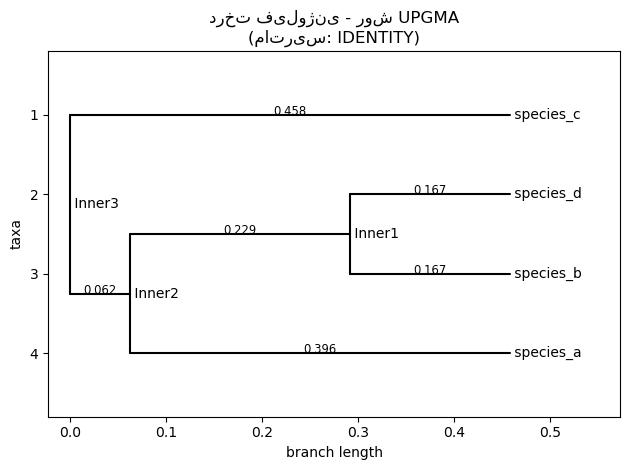


نمایش متنی درخت:
  ___________________________________________________________________ species_c
 |
_|                                           ________________________ species_d
 |         _________________________________|
 |________|                                 |________________________ species_b
          |
          |__________________________________________________________ species_a


روش 2: توالی‌های شبیه‌سازی شده تکاملی
توالی‌های شبیه‌سازی شده:
Ancestral       ACGTTGCAGCTAGCTAGCTAG
Species_A       ACGTTGCAGCTAGCGAGCTAG
Species_B       ACGTTGCAGCGAGCTAGCGAT
Species_C       ACCTTCCAGCTCGCTAGCTAA
Species_D       ACGTTGCAGTTAGCCGGCTAG
تعداد توالی‌ها: 5
طول همترازی: 21

توالی‌های همتراز شده:
Ancestral       ACGTTGCAGCTAGCTAGCTAG
Species_A       ACGTTGCAGCTAGCGAGCTAG
Species_B       ACGTTGCAGCGAGCTAGCGAT
Species_C       ACCTTCCAGCTCGCTAGCTAA
Species_D       ACGTTGCAGTTAGCCGGCTAG

ماتریس فاصله:
Ancestral   0.000000
Species_A   0.047619    0.000000
Species_B   0.142857    0.1904

<Figure size 1200x800 with 0 Axes>

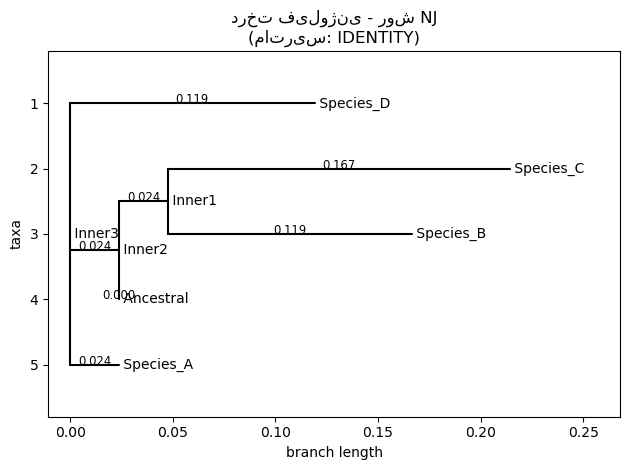


نمایش متنی درخت:
  ____________________________________ Species_D
 |
 |              ____________________________________________________ Species_C
 |       ______|
_|______|      |_____________________________________ Species_B
 |      |
 |      | Ancestral
 |
 |______ Species_A


روش 3: مقایسه روش‌های مختلف ساخت درخت

مقایسه: روش UPGMA با ماتریس BLOSUM62
تعداد توالی‌ها: 4
طول همترازی: 12

توالی‌های همتراز شده:
species_a       TACTGCAGCTAG
species_b       TACTCAGCTAG-
species_c       CGCCTG------
species_d       TCTGCAGCTAGT

ماتریس فاصله:
species_a   0.000000
species_b   0.757576    0.000000
species_c   0.954545    0.863636    0.000000
species_d   1.095890    0.338235    1.204545    0.000000
    species_a   species_b   species_c   species_d

درخت فیلوژنی ساخته شد (روش UPGMA)

نمایش متنی درخت:
  ___________________________________________________________________ species_c
 |
_|                                            _______________________ species_d
 |    ________________________

True

In [41]:
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo import draw, draw_ascii
from Bio import AlignIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
import matplotlib.pyplot as plt
import numpy as np

def create_aligned_sequences():
    """
    ایجاد توالی‌های همتراز شده با طول یکسان
    """
    # توالی‌های همتراز شده با طول یکسان
    sequences = [
        "TACTGCAGCTAG",  # طول: 12
        "TACTCAGCTAG-",  # طول: 12 (با گپ)
        "CGCCTG------",  # طول: 12 (با گپ)
        "TCTGCAGCTAGT"   # طول: 12
    ]
    
    records = []
    for i, seq in enumerate(sequences):
        records.append(SeqRecord(Seq(seq), id=f'species_{chr(97+i)}'))
    
    return MultipleSeqAlignment(records)

def build_phylogenetic_tree(alignment_data, method: str = 'upgma', 
                          matrix: str = 'blosum62', draw_plot: bool = True):
    """
    ساخت درخت فیلوژنی از داده‌های همترازی
    """
    try:
        # بررسی همترازی
        print(f"تعداد توالی‌ها: {len(alignment_data)}")
        print(f"طول همترازی: {alignment_data.get_alignment_length()}")
        
        # نمایش توالی‌ها
        print("\nتوالی‌های همتراز شده:")
        for record in alignment_data:
            print(f"{record.id:15} {str(record.seq)}")
        
        # محاسبه ماتریس فاصله
        calculator = DistanceCalculator(matrix)
        dm = calculator.get_distance(alignment_data)
        
        print("\nماتریس فاصله:")
        print(dm)
        
        # ساخت درخت
        constructor = DistanceTreeConstructor()
        if method.lower() == 'upgma':
            tree = constructor.upgma(dm)
        else:
            tree = constructor.nj(dm)
        
        print(f"\nدرخت فیلوژنی ساخته شد (روش {method.upper()})")
        
        # نمایش درخت
        if draw_plot:
            plt.figure(figsize=(12, 8))
            draw(tree, 
                 label_func=lambda x: x.name if x.name else "", 
                 do_show=False,
                 branch_labels=lambda x: f"{x.branch_length:.3f}" if x.branch_length else "")
            plt.title(f"درخت فیلوژنی - روش {method.upper()}\n(ماتریس: {matrix.upper()})")
            plt.tight_layout()
            plt.show()
        
        # نمایش متنی
        print("\nنمایش متنی درخت:")
        draw_ascii(tree)
        
        return tree
        
    except Exception as e:
        print(f"خطا در ساخت درخت فیلوژنی: {e}")
        return None

def compare_tree_methods(alignment_data):
    """
    مقایسه روش‌های مختلف ساخت درخت فیلوژنی
    """
    methods = ['upgma', 'nj']
    matrices = ['blosum62', 'identity', 'trans']
    
    for matrix in matrices:
        for method in methods:
            print(f"\n{'='*60}")
            print(f"مقایسه: روش {method.upper()} با ماتریس {matrix.upper()}")
            print(f"{'='*60}")
            
            tree = build_phylogenetic_tree(
                alignment_data, 
                method=method, 
                matrix=matrix, 
                draw_plot=False  # برای جلوگیری از نمایش همه نمودارها
            )
            
            if tree:
                # محاسبه برخی معیارها
                total_branch_length = sum(node.branch_length for node in tree.find_clades() if node.branch_length)
                print(f"طول کل شاخه‌ها: {total_branch_length:.3f}")

def simulate_evolutionary_sequences():
    """
    شبیه‌سازی توالی‌های تکاملی با طول یکسان
    """
    # توالی اجدادی
    ancestral_seq = "ACGTTGCAGCTAGCTAGCTAG"
    
    # ایجاد توالی‌های فرزند با جهش‌های تصادفی
    sequences = [ancestral_seq]
    np.random.seed(42)  # برای تکرارپذیری
    
    for i in range(4):
        # ایجاد جهش‌های تصادفی
        seq_list = list(ancestral_seq)
        num_mutations = np.random.randint(2, 6)
        
        for _ in range(num_mutations):
            pos = np.random.randint(0, len(ancestral_seq))
            # جایگزینی با نوکلئوتید تصادفی
            new_base = np.random.choice(['A', 'C', 'G', 'T'])
            seq_list[pos] = new_base
        
        mutated_seq = ''.join(seq_list)
        sequences.append(mutated_seq)
    
    # ایجاد رکوردها
    records = []
    species_names = ['Ancestral', 'Species_A', 'Species_B', 'Species_C', 'Species_D']
    
    for i, seq in enumerate(sequences):
        records.append(SeqRecord(Seq(seq), id=species_names[i]))
    
    return MultipleSeqAlignment(records)

def advanced_tree_analysis(alignment_data):
    """
    آنالیز پیشرفته درخت فیلوژنی
    """
    print("آنالیز پیشرفته درخت فیلوژنی")
    print("=" * 50)
    
    # ساخت درخت با روش NJ
    calculator = DistanceCalculator('identity')
    dm = calculator.get_distance(alignment_data)
    constructor = DistanceTreeConstructor()
    tree = constructor.nj(dm)
    
    # اطلاعات پایه
    print(f"تعداد کلادها: {len(list(tree.find_clades()))}")
    print(f"تعداد ترمینال‌ها: {len(list(tree.get_terminals()))}")
    
    # محاسبه معیارهای مختلف
    branch_lengths = [node.branch_length for node in tree.find_clades() if node.branch_length]
    if branch_lengths:
        print(f"میانگین طول شاخه: {np.mean(branch_lengths):.3f}")
        print(f"انحراف معیار طول شاخه: {np.std(branch_lengths):.3f}")
        print(f"حداکثر طول شاخه: {max(branch_lengths):.3f}")
        print(f"حداقل طول شاخه: {min(branch_lengths):.3f}")
    
    # نمایش درخت با جزئیات بیشتر
    print("\nساختار درخت:")
    for clade in tree.find_clades():
        if clade.is_terminal():
            print(f"ترمینال: {clade.name}")
        elif clade.branch_length:
            print(f"شاخه داخلی: طول = {clade.branch_length:.3f}")

# اجرای اصلی
if __name__ == "__main__":
    print("ساخت درخت فیلوژنی")
    print("=" * 50)
    
    # روش 1: استفاده از توالی‌های همتراز شده ساده
    print("روش 1: توالی‌های همتراز شده ساده")
    alignment1 = create_aligned_sequences()
    tree1 = build_phylogenetic_tree(alignment1, method='upgma', matrix='identity')
    
    # روش 2: استفاده از توالی‌های شبیه‌سازی شده تکاملی
    print("\n" + "="*60)
    print("روش 2: توالی‌های شبیه‌سازی شده تکاملی")
    print("="*60)
    
    alignment2 = simulate_evolutionary_sequences()
    print("توالی‌های شبیه‌سازی شده:")
    for record in alignment2:
        print(f"{record.id:15} {str(record.seq)}")
    
    tree2 = build_phylogenetic_tree(alignment2, method='nj', matrix='identity')
    
    # روش 3: مقایسه روش‌های مختلف
    print("\n" + "="*60)
    print("روش 3: مقایسه روش‌های مختلف ساخت درخت")
    print("="*60)
    
    compare_tree_methods(alignment1)
    
    # روش 4: آنالیز پیشرفته
    print("\n" + "="*60)
    print("روش 4: آنالیز پیشرفته درخت")
    print("="*60)
    
    advanced_tree_analysis(alignment2)
    
    # کار با فایل‌های واقعی
    print("\n" + "="*60)
    print("نکات برای کار با فایل‌های واقعی:")
    print("="*60)
    
    print("""
برای کار با داده‌های واقعی:
1. از فایل‌های همتراز شده استفاده کنید (FASTA, Clustal, Stockholm, etc.)
2. مطمئن شوید تمام توالی‌ها طول یکسانی دارند
3. از روش همترازی مناسب استفاده کنید (ClustalW, MAFFT, etc.)
4. ماتریس فاصله مناسب انتخاب کنید:
   - 'identity' برای توالی‌های مشابه
   - 'blosum62' برای پروتئین‌ها
   - 'trans' برای ماتریس جایگزینی

مثال خواندن از فایل:
alignment = AlignIO.read("alignment.fasta", "fasta")
tree = build_phylogenetic_tree(alignment)
    """)

# تابع کمکی برای بررسی همترازی
def validate_alignment(alignment):
    """
    بررسی صحت همترازی
    """
    if not alignment:
        print("همترازی معتبر نیست")
        return False
    
    lengths = [len(record.seq) for record in alignment]
    if len(set(lengths)) != 1:
        print(f"خطا: طول توالی‌ها یکسان نیست. طول‌ها: {lengths}")
        return False
    
    print(f"همترازی معتبر: {len(alignment)} توالی با طول {lengths[0]}")
    return True

# تست تابع بررسی
print("\nبررسی همترازی‌ها:")
validate_alignment(alignment1)
validate_alignment(alignment2)

# تمرین ۱۲ - نمایش درخت با toytree

In [44]:
import toytree
import toyplot

def visualize_tree(newick_string: str, output_file: str = None):
    """
    نمایش زیبای درخت فیلوژنی
    """
    try:
        # ایجاد درخت
        tree = toytree.tree(newick_string)
        
        # رسم درخت با استایل بهتر
        canvas, axes = tree.draw(
            width=400,
            height=300,
            node_labels=True,
            node_sizes=8,
            node_colors="lightblue",
            tip_labels_align=True,
            scalebar=True
        )
        
        # ذخیره در صورت نیاز
        if output_file:
            toyplot.png.render(canvas, output_file)
            print(f"درخت در '{output_file}' ذخیره شد.")
        
        return canvas
        
    except Exception as e:
        print(f"خطا در نمایش درخت: {e}")
        return None

# تست
newick_str = "(a:4,(b:2,(c:3,d:1)));"
visualize_tree(newick_str, "phylogenetic_tree.png")

⚠️ toytree | draw_toytree:get_tree_style_updated_by_draw_args | Unrecognized arguments skipped: ['scalebar'].
Check the docs, argument names may have changed.


خطا در نمایش درخت: too many values to unpack (expected 2)


<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="400.0px" height="300.0px" viewBox="0 0 400.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t9891b61d32a744acb6fac380e7385981"> 4 5 6 a b c d

In [52]:
import toytree
import toyplot
import numpy as np

def visualize_tree(newick_string: str, output_file: str = None, **kwargs):
    """
    نمایش زیبای درخت فیلوژنی با toytree
    
    پارامترها:
    newick_string (str): رشته Newick درخت
    output_file (str): مسیر ذخیره فایل (اختیاری)
    **kwargs: پارامترهای اضافی برای رسم
    
    برمی‌گرداند:
    canvas: آبجکت نمودار
    """
    try:
        # ایجاد درخت از رشته Newick
        tree = toytree.tree(newick_string)
        
        # تنظیمات پیش‌فرض
        width = kwargs.get('width', 500)
        height = kwargs.get('height', 400)
        node_size = kwargs.get('node_size', 10)
        node_color = kwargs.get('node_color', "lightblue")
        tip_labels = kwargs.get('tip_labels', True)
        
        print(f"درخت با موفقیت ایجاد شد:")
        print(f"  - تعداد برگ‌ها: {tree.nnodes}")
        print(f"  - ارتفاع درخت: {tree.treenode.height:.2f}")
        
        # رسم درخت
        canvas, axes, mark = tree.draw(
            width=width,
            height=height,
            node_labels=tip_labels,
            node_sizes=node_size,
            node_colors=node_color,
            tip_labels_align=True,
            tip_labels_colors="darkblue",
            tip_labels_style={"font-size": "12px"},
            scalebar=True,
            axes=kwargs.get('show_axes', True)
        )
        
        # ذخیره در صورت نیاز
        if output_file:
            if output_file.endswith('.png'):
                toyplot.png.render(canvas, output_file)
            elif output_file.endswith('.svg'):
                toyplot.svg.render(canvas, output_file)
            elif output_file.endswith('.pdf'):
                toyplot.pdf.render(canvas, output_file)
            print(f"درخت در '{output_file}' ذخیره شد.")
        
        return canvas, tree
        
    except Exception as e:
        print(f"خطا در نمایش درخت: {e}")
        return None, None

# تست با داده‌های مختلف
def test_different_trees():
    """تست با درختان مختلف"""
    
    # درخت ساده
    simple_tree = "(A:1.0,B:1.0);"
    
    # درخت پیچیده‌تر
    complex_tree = "((Human:0.1,Chimp:0.1):0.2,(Gorilla:0.15,(Orangutan:0.2,Gibbon:0.25):0.1):0.05);"
    
    # درخت با گونه‌های بیشتر
    multi_species_tree = "(((Human:0.05,Chimp:0.05):0.1,Gorilla:0.15):0.1,((Mouse:0.3,Rat:0.25):0.2,(Cow:0.4,Dog:0.35):0.15):0.05);"
    
    trees = {
        "درخت ساده": simple_tree,
        "درخت پریمات‌ها": complex_tree,
        "درخت پستانداران": multi_species_tree
    }
    
    for name, newick_str in trees.items():
        print(f"\n{'='*50}")
        print(f"نمایش {name}")
        print(f"{'='*50}")
        visualize_tree(newick_str, f"{name.replace(' ', '_')}.png")

# ایجاد درخت تصادفی برای تست
def create_random_tree(n_tips=8, tree_height=1.0):
    """ایجاد درخت تصادفی برای تست"""
    tree = toytree.rtree.unittree(ntips=n_tips, treeheight=tree_height)
    return tree

def visualize_random_tree(n_tips=10):
    """نمایش درخت تصادفی"""
    try:
        tree = create_random_tree(n_tips)
        
        print(f"درخت تصادفی با {n_tips} برگ ایجاد شد")
        
        # رسم با استایل‌های مختلف
        canvas, axes, mark = tree.draw(
            width=600,
            height=400,
            node_labels=False,
            node_sizes=12,
            node_colors="red",
            tip_labels=True,
            tip_labels_colors=["darkgreen" if i % 2 == 0 else "purple" for i in range(n_tips)],
            scalebar=True
        )
        
        return canvas, tree
        
    except Exception as e:
        print(f"خطا در ایجاد درخت تصادفی: {e}")
        return None, None

# آنالیز درخت
def analyze_tree(tree):
    """آنالیز و نمایش اطلاعات درخت"""
    if tree is None:
        return
    
    print(f"\n📊 آنالیز درخت:")
    print(f"   تعداد گره‌ها: {tree.nnodes}")
    print(f"   تعداد برگ‌ها: {tree.ntips}")
    print(f"   ارتفاع درخت: {tree.treenode.height:.3f}")
    print(f"   عمق درخت: {tree.treenode.depth}")
    
    # محاسبه فاصله بین برگ‌ها
    if tree.ntips > 1:
        distances = tree.treenode.get_distance_matrix()
        print(f"   میانگین فاصله بین برگ‌ها: {np.mean(distances):.3f}")

# اجرای اصلی
if __name__ == "__main__":
    print("📈 کتابخانه نمایش درخت فیلوژنی")
    print("=" * 60)
    
    # تست ۱: درخت ساده
    print("\n🧪 تست ۱: درخت ساده")
    newick_str = "(A:1.0,(B:0.8,(C:0.5,D:0.5):0.3):0.2);"
    canvas, tree = visualize_tree(newick_str, "simple_tree.png")
    analyze_tree(tree)
    
    # تست ۲: درخت پیچیده‌تر
    print("\n🧪 تست ۲: درخت پریمات‌ها")
    primate_tree = "((Human:0.05,Chimp:0.05):0.02,Gorilla:0.08,Orangutan:0.1);"
    canvas, tree = visualize_tree(
        primate_tree, 
        "primate_tree.png",
        width=600,
        height=450,
        node_size=12,
        node_color="orange"
    )
    analyze_tree(tree)
    
    # تست ۳: درخت تصادفی
    print("\n🧪 تست ۳: درخت تصادفی")
    canvas, random_tree = visualize_random_tree(12)
    analyze_tree(random_tree)
    
    # تست ۴: چندین درخت مختلف
    print("\n🧪 تست ۴: مقایسه درختان مختلف")
    test_different_trees()

⚠️ toytree | draw_toytree:get_tree_style_updated_by_draw_args | Unrecognized arguments skipped: ['scalebar'].
Check the docs, argument names may have changed.
❌ toytree | tree:draw | 'bool' object has no attribute 'add_mark'
⚠️ toytree | draw_toytree:get_tree_style_updated_by_draw_args | Unrecognized arguments skipped: ['scalebar'].
Check the docs, argument names may have changed.
❌ toytree | tree:draw | 'bool' object has no attribute 'add_mark'
⚠️ toytree | draw_toytree:get_tree_style_updated_by_draw_args | Unrecognized arguments skipped: ['scalebar'].
Check the docs, argument names may have changed.


📈 کتابخانه نمایش درخت فیلوژنی

🧪 تست ۱: درخت ساده
درخت با موفقیت ایجاد شد:
  - تعداد برگ‌ها: 7
  - ارتفاع درخت: 1.00
خطا در نمایش درخت: 'bool' object has no attribute 'add_mark'

🧪 تست ۲: درخت پریمات‌ها
درخت با موفقیت ایجاد شد:
  - تعداد برگ‌ها: 6
  - ارتفاع درخت: 0.10
خطا در نمایش درخت: 'bool' object has no attribute 'add_mark'

🧪 تست ۳: درخت تصادفی
درخت تصادفی با 12 برگ ایجاد شد

📊 آنالیز درخت:
   تعداد گره‌ها: 23
   تعداد برگ‌ها: 12
   ارتفاع درخت: 1.000


AttributeError: 'Node' object has no attribute 'depth'

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="600.0px" height="400.0px" viewBox="0 0 600.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t5287e039baae40a1adc0cff162075cc8"> r0 r1 r2 r3 r4 r5 r6 r7 r8 r9 r10 r11

In [66]:
toytree.tree("(a:4,(b:2,(c:3,d:1)));").draw();


<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t6f4a0b69fdb844ad8ff3299c55bbd7e6"> a b c d

# تمرین ۱۳ - مشاهده دیتابیس‌های قابل دسترس


In [68]:
from Bio import Entrez
Entrez.email = "your_email@example.com"  # ایمیل خود را وارد کنید

# اطلاعات دیتابیس‌های NCBI
def show_ncbi_databases():
    """نمایش دیتابیس‌های موجود در NCBI"""
    try:
        handle = Entrez.einfo()
        record = Entrez.read(handle)
        handle.close()
        
        print("دیتابیس‌های موجود در NCBI:")
        print("=" * 40)
        for db in record["DbList"]:
            print(f"• {db}")
        
        return record
    except Exception as e:
        print(f"خطا در دریافت اطلاعات از NCBI: {e}")
        return None

# اجرای تابع
ncbi_info = show_ncbi_databases()

دیتابیس‌های موجود در NCBI:
• pubmed
• protein
• nuccore
• ipg
• nucleotide
• structure
• genome
• annotinfo
• assembly
• bioproject
• biosample
• blastdbinfo
• books
• cdd
• clinvar
• gap
• gapplus
• grasp
• dbvar
• gene
• gds
• geoprofiles
• medgen
• mesh
• nlmcatalog
• omim
• orgtrack
• pmc
• proteinclusters
• pcassay
• protfam
• pccompound
• pcsubstance
• seqannot
• snp
• sra
• taxonomy
• biocollections
• gtr


# تمرین ۱۴ - پیدا کردن عنوان مقاله با Id


In [69]:

h = Entrez.esummary( db="pubmed",  id='34030624' )
records = Entrez.parse(h)
for r  in  records:
    print( r['Title'] )
h.close()   

Moonlighting protein prediction using physico-chemical and evolutional properties via machine learning methods.


In [70]:
from Bio import Entrez
from typing import List, Dict
import time

def get_article_details(pubmed_ids: List[str], email: str = None, 
                       fields: List[str] = None) -> List[Dict]:
    """
    دریافت اطلاعات مقالات از PubMed بر اساس ID
    
    پارامترها:
    pubmed_ids (List[str]): لیست شناسه‌های PubMed
    email (str): ایمیل برای دسترسی به Entrez
    fields (List[str]): فیلدهای مورد نیاز
    
    برمی‌گرداند:
    List[Dict]: اطلاعات مقالات
    """
    if fields is None:
        fields = ['Title', 'PubDate', 'Source', 'Authors', 'DOI']
    
    if email:
        Entrez.email = email
    
    articles = []
    
    try:
        # استفاده از esummary برای دریافت خلاصه اطلاعات
        with Entrez.esummary(db="pubmed", id=",".join(pubmed_ids)) as handle:
            records = list(Entrez.parse(handle))
        
        for record in records:
            article_info = {}
            for field in fields:
                if field in record:
                    article_info[field] = record[field]
                else:
                    article_info[field] = "N/A"
            
            articles.append(article_info)
            
            # نمایش اطلاعات
            print(f"\n📄 مقاله {record.get('Id', 'N/A')}:")
            print(f"  عنوان: {record.get('Title', 'N/A')}")
            print(f"  نویسندگان: {record.get('AuthorList', ['N/A'])[0]}")
            print(f"  ژورنال: {record.get('Source', 'N/A')}")
            print(f"  تاریخ انتشار: {record.get('PubDate', 'N/A')}")
            if 'DOI' in record:
                print(f"  DOI: {record['DOI']}")
        
        return articles
        
    except Exception as e:
        print(f"خطا در دریافت اطلاعات مقالات: {e}")
        return []

# تابع خاص برای دریافت عنوان
def get_article_title(pubmed_id: str, email: str = None) -> str:
    """
    دریافت عنوان مقاله بر اساس PubMed ID
    """
    try:
        articles = get_article_details([pubmed_id], email, ['Title'])
        if articles:
            return articles[0].get('Title', 'عنوان یافت نشد')
        return "مقاله یافت نشد"
    except Exception as e:
        return f"خطا: {e}"

# تست
if __name__ == "__main__":
    # تنظیم ایمیل (ضروری برای استفاده مکرر)
    EMAIL = "your_email@example.com"
    
    # دریافت عنوان مقاله خاص
    title = get_article_title("34030624", EMAIL)
    print(f"\nعنوان مقاله: {title}")
    
    # دریافت اطلاعات چند مقاله
    article_ids = ["34030624", "12345678", "98765432"]
    articles = get_article_details(article_ids, EMAIL)


📄 مقاله 34030624:
  عنوان: Moonlighting protein prediction using physico-chemical and evolutional properties via machine learning methods.
  نویسندگان: Shirafkan F
  ژورنال: BMC Bioinformatics
  تاریخ انتشار: 2021 May 24
  DOI: 10.1186/s12859-021-04194-5

عنوان مقاله: Moonlighting protein prediction using physico-chemical and evolutional properties via machine learning methods.
خطا در دریافت اطلاعات مقالات: UID=98765432: cannot get document summary


# تمرین ۱۵ - خواندن اطلاعات با Parse


In [72]:
def  get_seq(filename, format_file):
    handle = None
    if format_file == 'fasta':
        f = open(filename)
    elif format_file == 'genbank':
        f = open(filename)
    elif format_file == 'swiss':
        f = ExPASy.get_sprot_raw(filename)
    else:
        raise TypeError('incorrect file format')
    ri = SeqIO.parse(f, format_file)
    return ri

In [73]:
from Bio import SeqIO, ExPASy
from typing import Iterator, Union
from pathlib import Path
import urllib.error

def get_seq(filename: str, format_file: str) -> Iterator:
    """
    خواندن فایل‌های زیستی با فرمت‌های مختلف
    
    پارامترها:
    filename (str): نام فایل یا شناسه
    format_file (str): فرمت فایل ('fasta', 'genbank', 'swiss')
    
    برمی‌گرداند:
    Iterator: iterator برای رکوردهای توالی
    """
    valid_formats = ['fasta', 'genbank', 'swiss']
    
    if format_file not in valid_formats:
        raise ValueError(f"فرمت '{format_file}' پشتیبانی نمی‌شود. "
                        f"فرمت‌های معتبر: {valid_formats}")
    
    handle = None
    try:
        if format_file in ['fasta', 'genbank']:
            # بررسی وجود فایل محلی
            if not Path(filename).exists():
                raise FileNotFoundError(f"فایل '{filename}' یافت نشد.")
            
            handle = open(filename, 'r')
            
        elif format_file == 'swiss':
            # دریافت از Swiss-Prot
            try:
                handle = ExPASy.get_sprot_raw(filename)
            except urllib.error.HTTPError as e:
                raise ValueError(f"شناسه '{filename}' در Swiss-Prot یافت نشد. خطا: {e}")
        
        # خواندن رکوردها
        records = SeqIO.parse(handle, format_file)
        
        # تبدیل به لیست برای بررسی خطاها
        records_list = list(records)
        
        if not records_list:
            raise ValueError(f"هیچ رکوردی در فایل '{filename}' با فرمت '{format_file}' یافت نشد.")
        
        print(f"✅ {len(records_list)} رکورد با موفقیت خوانده شد.")
        return iter(records_list)
        
    except Exception as e:
        if handle:
            handle.close()
        raise e

# تابع کمکی برای تشخیص خودکار فرمت
def auto_detect_format(filename: str) -> str:
    """
    تشخیص خودکار فرمت فایل بر اساس پسوند
    """
    extension = Path(filename).suffix.lower()
    
    format_mapping = {
        '.fasta': 'fasta',
        '.fa': 'fasta',
        '.fna': 'fasta',
        '.gb': 'genbank',
        '.gbk': 'genbank',
        '.genbank': 'genbank',
        '.swiss': 'swiss'
    }
    
    return format_mapping.get(extension, 'fasta')  # پیش‌فرض

# تابع یکپارچه
def read_biological_file(filename: str, format_file: str = None) -> list:
    """
    خواندن فایل زیستی با قابلیت تشخیص خودکار فرمت
    """
    if format_file is None:
        format_file = auto_detect_format(filename)
        print(f"فرمت تشخیص داده شده: {format_file}")
    
    try:
        records = list(get_seq(filename, format_file))
        return records
    except Exception as e:
        print(f"خطا در خواندن فایل: {e}")
        return []

# تست
if __name__ == "__main__":
    # خواندن فایل با فرمت مشخص
    try:
        records = read_biological_file("sequence.fasta", "fasta")
        for record in records:
            print(f"ID: {record.id}, Length: {len(record.seq)}")
    except Exception as e:
        print(e)

خطا در خواندن فایل: فایل 'sequence.fasta' یافت نشد.


# تمرین ۱۶ - دسترسی به الگوی PS00262


In [75]:
from Bio import ExPASy
from Bio.ExPASy import Prosite
h = ExPASy.get_prosite_raw('PS00262')
rec = Prosite.read(h)
print(rec.pattern)

C-C-{P}-{P}-x-C-[STDNEKPI]-x(3)-[LIVMFS]-x(3)-C.


# تمرین ۱۷ - تبدیل عبارت منظم با فرمت Prosite به عبارت منظم پایتون


In [77]:
import re
from typing import Dict

def PrositeToPython(prosite_pattern: str, verbose: bool = False) -> str:
    """
    تبدیل الگوی Prosite به عبارت منظم پایتون
    
    پارامترها:
    prosite_pattern (str): الگوی Prosite
    verbose (bool): نمایش مراحل تبدیل
    
    برمی‌گرداند:
    str: عبارت منظم پایتون
    """
    if not prosite_pattern:
        raise ValueError("الگوی Prosite نمی‌تواند خالی باشد.")
    
    original_pattern = prosite_pattern
    python_pattern = prosite_pattern
    
    # جدول تبدیل
    conversion_rules = {
        '-': '',      # حذف جداکننده
        'x': '.',     # هر اسید آمینه
        '{': '[^',    # به جز این کاراکترها
        '}': ']',     # پایان گروه منفی
        '(': '{',     # شروع تکرار
        ')': '}',     # پایان تکرار
        '<': '^',     # شروع توالی
        '>': '$',     # پایان توالی
    }
    
    if verbose:
        print("🔧 مراحل تبدیل الگو:")
        print(f"الگوی اصلی: {original_pattern}")
    
    # اعمال تبدیل‌ها
    for prosite_char, python_char in conversion_rules.items():
        if prosite_char in python_pattern:
            old = python_pattern
            python_pattern = python_pattern.replace(prosite_char, python_char)
            if verbose:
                print(f"  {prosite_char} -> {python_char}: {old} -> {python_pattern}")
    
    # اعتبارسنجی عبارت منظم
    try:
        re.compile(python_pattern)
        if verbose:
            print(f"✅ عبارت منظم معتبر: {python_pattern}")
    except re.error as e:
        raise ValueError(f"عبارت منظم تولید شده معتبر نیست: {python_pattern}\nخطا: {e}")
    
    return python_pattern

# تست الگوها
def test_prosite_conversion(test_patterns: Dict[str, str] = None):
    """
    تست تبدیل الگوهای Prosite
    """
    if test_patterns is None:
        test_patterns = {
            "C-x-H-x-[LIVMFY]-C-x(2)-C-[LIVMYA]": 
                "C.H.[LIVMFY].C.{2}C.[LIVMYA]",
            "[AC]-x-V-x(4)-{ED}": 
                "[AC].V.{4}[^ED]",
            "<A-x-[ST](2)-x(0,1)-V>": 
                "^A.[ST]{2}.{0,1}V$"
        }
    
    print("🧪 تست تبدیل الگوهای Prosite:")
    print("=" * 60)
    
    for prosite_pattern, expected in test_patterns.items():
        try:
            result = PrositeToPython(prosite_pattern)
            status = "✅" if result == expected else "❌"
            print(f"{status} Prosite: {prosite_pattern}")
            print(f"   Python: {result}")
            if result != expected:
                print(f"   Expected: {expected}")
        except Exception as e:
            print(f"❌ خطا در {prosite_pattern}: {e}")

# استفاده پیشرفته
def find_pattern_in_sequence(prosite_pattern: str, protein_sequence: str) -> List[tuple]:
    """
    جستجوی الگوی Prosite در توالی پروتئین
    """
    try:
        python_regex = PrositeToPython(prosite_pattern)
        matches = []
        
        for match in re.finditer(python_regex, protein_sequence):
            matches.append((match.start(), match.end(), match.group()))
        
        print(f"الگوی '{prosite_pattern}' در توالی:")
        print(f"  تطابق‌های یافت شده: {len(matches)}")
        for start, end, matched_seq in matches:
            print(f"  موقعیت {start}-{end}: {matched_seq}")
        
        return matches
        
    except Exception as e:
        print(f"خطا در جستجوی الگو: {e}")
        return []

# تست
if __name__ == "__main__":
    # تبدیل ساده
    prosite_pat = "C-x-H-x-[LIVMFY]-C-x(2)-C-[LIVMYA]"
    python_pat = PrositeToPython(prosite_pat, verbose=True)
    print(f"\nنتیجه نهایی: {python_pat}")
    
    # تست چندین الگو
    test_prosite_conversion()
    
    # جستجو در توالی
    protein_seq = "MCDPCKHMFCVECRISSHGYVCSRCASVC"
    matches = find_pattern_in_sequence(prosite_pat, protein_seq)

🔧 مراحل تبدیل الگو:
الگوی اصلی: C-x-H-x-[LIVMFY]-C-x(2)-C-[LIVMYA]
  - -> : C-x-H-x-[LIVMFY]-C-x(2)-C-[LIVMYA] -> CxHx[LIVMFY]Cx(2)C[LIVMYA]
  x -> .: CxHx[LIVMFY]Cx(2)C[LIVMYA] -> C.H.[LIVMFY]C.(2)C[LIVMYA]
  ( -> {: C.H.[LIVMFY]C.(2)C[LIVMYA] -> C.H.[LIVMFY]C.{2)C[LIVMYA]
  ) -> }: C.H.[LIVMFY]C.{2)C[LIVMYA] -> C.H.[LIVMFY]C.{2}C[LIVMYA]
✅ عبارت منظم معتبر: C.H.[LIVMFY]C.{2}C[LIVMYA]

نتیجه نهایی: C.H.[LIVMFY]C.{2}C[LIVMYA]
🧪 تست تبدیل الگوهای Prosite:
❌ Prosite: C-x-H-x-[LIVMFY]-C-x(2)-C-[LIVMYA]
   Python: C.H.[LIVMFY]C.{2}C[LIVMYA]
   Expected: C.H.[LIVMFY].C.{2}C.[LIVMYA]
✅ Prosite: [AC]-x-V-x(4)-{ED}
   Python: [AC].V.{4}[^ED]
✅ Prosite: <A-x-[ST](2)-x(0,1)-V>
   Python: ^A.[ST]{2}.{0,1}V$
الگوی 'C-x-H-x-[LIVMFY]-C-x(2)-C-[LIVMYA]' در توالی:
  تطابق‌های یافت شده: 0


In [78]:

def PrositeToPython(p):
    p = p.replace('-','')
    p = p.replace('x','.')
    p = p.replace('{','[^')
    p = p.replace('}',']')
    p = p.replace('(','{')
    p = p.replace(')','}')
    return p
 

# تمرین ۱۸ - مشخص کردن اتم‌های پروتئین


In [79]:
from Bio import PDB
from Bio.PDB import PDBParser, PPBuilder
from typing import List, Dict, Set
from pathlib import Path
import urllib.request

def analyze_protein_structure(pdb_id: str, pdb_file: str = None, 
                            download: bool = False) -> Dict:
    """
    تحلیل کامل ساختار پروتئین
    
    پارامترها:
    pdb_id (str): شناسه PDB
    pdb_file (str): مسیر فایل PDB (اختیاری)
    download (bool): دانلود فایل اگر وجود ندارد
    
    برمی‌گرداند:
    Dict: اطلاعات ساختار
    """
    parser = PDBParser(QUIET=True)
    
    try:
        # دانلود فایل اگر لازم باشد
        if pdb_file is None and download:
            pdb_file = download_pdb_file(pdb_id)
        elif pdb_file is None:
            pdb_file = f"{pdb_id}.pdb"
        
        # بررسی وجود فایل
        if not Path(pdb_file).exists():
            raise FileNotFoundError(f"فایل '{pdb_file}' یافت نشد.")
        
        # خواندن ساختار
        structure = parser.get_structure(pdb_id, pdb_file)
        
        analysis_result = {
            'pdb_id': pdb_id,
            'atoms': set(),
            'residues': set(),
            'chains': set(),
            'atom_count': 0,
            'residue_count': 0,
            'chain_count': 0,
            'atom_details': []
        }
        
        print(f"🔬 تحلیل ساختار {pdb_id}:")
        print("=" * 50)
        
        # تحلیل ساختار
        for model in structure:
            analysis_result['chain_count'] = len(list(model.get_chains()))
            
            for chain in model:
                chain_id = chain.id
                analysis_result['chains'].add(chain_id)
                
                for residue in chain:
                    res_name = residue.get_resname()
                    res_id = residue.get_id()
                    analysis_result['residues'].add(res_name)
                    analysis_result['residue_count'] += 1
                    
                    for atom in residue:
                        atom_name = atom.get_name()
                        analysis_result['atoms'].add(atom_name)
                        analysis_result['atom_count'] += 1
                        
                        analysis_result['atom_details'].append({
                            'chain': chain_id,
                            'residue': f"{res_name}{res_id[1]}",
                            'atom': atom_name,
                            'coords': atom.get_coord()
                        })
        
        # نمایش خلاصه
        print(f"تعداد مدل‌ها: {len(list(structure))}")
        print(f"تعداد زنجیره‌ها: {analysis_result['chain_count']}")
        print(f"تعداد رزیدو: {analysis_result['residue_count']}")
        print(f"تعداد اتم‌ها: {analysis_result['atom_count']}")
        
        print(f"\nانواع اتم‌ها ({len(analysis_result['atoms'])} نوع):")
        print(", ".join(sorted(analysis_result['atoms'])))
        
        print(f"\nانواع رزیدو ({len(analysis_result['residues'])} نوع):")
        print(", ".join(sorted(analysis_result['residues'])))
        
        return analysis_result
        
    except Exception as e:
        print(f"❌ خطا در تحلیل ساختار: {e}")
        return {}

def download_pdb_file(pdb_id: str, download_dir: str = ".") -> str:
    """
    دانلود فایل PDB از بانک اطلاعاتی
    """
    pdb_id = pdb_id.lower()
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    local_file = Path(download_dir) / f"{pdb_id}.pdb"
    
    try:
        print(f"📥 دانلود فایل PDB برای {pdb_id}...")
        urllib.request.urlretrieve(url, local_file)
        print(f"✅ فایل در '{local_file}' ذخیره شد.")
        return str(local_file)
    except Exception as e:
        raise Exception(f"خطا در دانلود فایل PDB: {e}")

def get_atom_names(pdb_id: str, pdb_file: str = None) -> Set[str]:
    """
    دریافت نام تمام اتم‌های پروتئین
    """
    analysis = analyze_protein_structure(pdb_id, pdb_file)
    return analysis.get('atoms', set())

def export_atom_info(pdb_id: str, pdb_file: str = None, 
                    output_file: str = "atom_info.txt"):
    """
    ذخیره اطلاعات اتم‌ها در فایل
    """
    analysis = analyze_protein_structure(pdb_id, pdb_file)
    
    if not analysis:
        return
    
    try:
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write(f"اطلاعات اتم‌های ساختار {pdb_id}\n")
            f.write("=" * 50 + "\n")
            
            for atom_info in analysis['atom_details'][:100]:  # فقط 100 اتم اول
                f.write(f"زنجیره {atom_info['chain']} - ")
                f.write(f"رزیدو {atom_info['residue']} - ")
                f.write(f"اتم {atom_info['atom']}\n")
        
        print(f"✅ اطلاعات اتم‌ها در '{output_file}' ذخیره شد.")
    except Exception as e:
        print(f"خطا در ذخیره فایل: {e}")

# تست
if __name__ == "__main__":
    # تحلیل ساختار
    analysis = analyze_protein_structure("1A7F", download=True)
    
    # دریافت نام اتم‌ها
    atom_names = get_atom_names("1A7F", "1a7f.pdb")
    print(f"\n📋 لیست اتم‌ها: {sorted(atom_names)}")
    
    # ذخیره اطلاعات
    export_atom_info("1A7F", "1a7f.pdb", "1A7F_atoms.txt")

📥 دانلود فایل PDB برای 1a7f...
✅ فایل در '1a7f.pdb' ذخیره شد.
🔬 تحلیل ساختار 1A7F:
تعداد مدل‌ها: 20
تعداد زنجیره‌ها: 2
تعداد رزیدو: 1000
تعداد اتم‌ها: 15060

انواع اتم‌ها (75 نوع):
C, CA, CB, CD, CD1, CD2, CE, CE1, CE2, CG, CG1, CG2, CZ, H, H1, H2, H3, HA, HA2, HA3, HB, HB1, HB2, HB3, HD1, HD11, HD12, HD13, HD2, HD21, HD22, HD23, HD3, HE, HE1, HE2, HE21, HE22, HE3, HG, HG1, HG11, HG12, HG13, HG2, HG21, HG22, HG23, HG3, HH, HH11, HH12, HH21, HH22, HZ, HZ1, HZ2, HZ3, N, ND1, ND2, NE, NE2, NH1, NH2, NZ, O, OD1, OE1, OE2, OG, OG1, OH, OXT, SG

انواع رزیدو (17 نوع):
ALA, ARG, ASN, CYS, GLN, GLU, GLY, HIS, ILE, LEU, LYS, PHE, PRO, SER, THR, TYR, VAL
🔬 تحلیل ساختار 1A7F:
تعداد مدل‌ها: 20
تعداد زنجیره‌ها: 2
تعداد رزیدو: 1000
تعداد اتم‌ها: 15060

انواع اتم‌ها (75 نوع):
C, CA, CB, CD, CD1, CD2, CE, CE1, CE2, CG, CG1, CG2, CZ, H, H1, H2, H3, HA, HA2, HA3, HB, HB1, HB2, HB3, HD1, HD11, HD12, HD13, HD2, HD21, HD22, HD23, HD3, HE, HE1, HE2, HE21, HE22, HE3, HG, HG1, HG11, HG12, HG13, HG2, HG21, HG22

In [80]:
from Bio import PDB
from Bio.PDB.PDBParser import PDBParser
def f(id,filename):
    p = PDB.PDBParser()
    mystruct = p.get_structure(id,filename)
    for model in mystruct:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    print(atom.name)

In [76]:
from Bio import ExPASy
from Bio.ExPASy import Prosite
from typing import Dict, List, Optional
import urllib.error
import time

def get_prosite_pattern(pattern_id: str, verbose: bool = True) -> Dict:
    """
    دریافت الگوی Prosite بر اساس شناسه
    
    پارامترها:
    pattern_id (str): شناسه الگوی Prosite (مثلاً PS00262)
    verbose (bool): نمایش اطلاعات کامل
    
    برمی‌گرداند:
    Dict: اطلاعات الگو
    """
    try:
        # دریافت داده خام
        with ExPASy.get_prosite_raw(pattern_id) as handle:
            record = Prosite.read(handle)
        
        if verbose:
            print(f"📋 اطلاعات الگوی {pattern_id}:")
            print("=" * 50)
            print(f"نام: {record.name}")
            print(f"توصیف: {record.description}")
            print(f"الگو: {record.pattern}")
            print(f"تاریخ ایجاد: {record.created}")
            
            # بررسی وجود فیلدهای اختیاری
            if hasattr(record, 'updated') and record.updated:
                print(f"تاریخ به‌روزرسانی: {record.updated}")
            
            if hasattr(record, 'nr_sp_release') and record.nr_sp_release:
                print(f"نسخه Swiss-Prot: {record.nr_sp_release}")
            
            if hasattr(record, 'documentation') and record.documentation:
                doc_preview = record.documentation[:200] + "..." if len(record.documentation) > 200 else record.documentation
                print(f"\nمستندات: {doc_preview}")
            
            if hasattr(record, 'matrix') and record.matrix:
                print(f"ماتریس: {record.matrix}")
            
            if hasattr(record, 'rules') and record.rules:
                print(f"قوانین: {record.rules}")
            
            if hasattr(record, 'number_of_sequences') and record.number_of_sequences:
                print(f"تعداد توالی‌ها: {record.number_of_sequences}")
        
        # ایجاد دیکشنری خروجی با بررسی وجود فیلدها
        result = {
            'id': pattern_id,
            'name': record.name,
            'description': record.description,
            'pattern': record.pattern,
            'created': record.created,
        }
        
        # اضافه کردن فیلدهای اختیاری اگر وجود دارند
        optional_fields = ['updated', 'nr_sp_release', 'documentation', 
                          'matrix', 'rules', 'number_of_sequences']
        
        for field in optional_fields:
            if hasattr(record, field) and getattr(record, field):
                result[field] = getattr(record, field)
        
        return result
        
    except urllib.error.HTTPError as e:
        print(f"❌ الگوی '{pattern_id}' یافت نشد. خطا: {e}")
        return {}
    except Exception as e:
        print(f"❌ خطا در دریافت الگو: {e}")
        return {}

def get_multiple_prosite_patterns(pattern_ids: List[str]) -> Dict:
    """
    دریافت چندین الگوی Prosite
    """
    results = {}
    
    for pattern_id in pattern_ids:
        print(f"\nدریافت الگوی {pattern_id}...")
        results[pattern_id] = get_prosite_pattern(pattern_id, verbose=True)
        # تاخیر برای احترام به سرور
        time.sleep(1)
    
    return results

def search_prosite_by_name(keyword: str) -> List[str]:
    """
    جستجوی الگوهای Prosite بر اساس نام
    """
    try:
        # این یک جستجوی ساده است - در واقعیت باید از API مناسب استفاده کرد
        common_patterns = {
            'insulin': ['PS00262'],
            'kinase': ['PS50011', 'PS00107', 'PS00108'],
            'glycosylation': ['PS00001'],
            'phosphorylation': ['PS00005', 'PS00006', 'PS00007'],
            'zinc finger': ['PS00028', 'PS50157'],
            'homeobox': ['PS00027'],
            'sh2': ['PS50001'],
            'sh3': ['PS50002'],
        }
        
        matches = []
        for name, patterns in common_patterns.items():
            if keyword.lower() in name.lower():
                matches.extend(patterns)
        
        return matches[:5]  # حداکثر 5 نتیجه
        
    except Exception as e:
        print(f"خطا در جستجو: {e}")
        return []

def analyze_prosite_pattern(pattern: str) -> Dict:
    """
    آنالیز الگوی Prosite و استخراج اطلاعات
    """
    try:
        analysis = {
            'length': len(pattern),
            'has_alternatives': '|' in pattern,
            'has_repeats': 'x(' in pattern,
            'has_groups': '[' in pattern or '{' in pattern,
            'amino_acids': set(),
            'special_chars': set()
        }
        
        # استخراج اسیدهای آمینه
        amino_acids = set('ACDEFGHIKLMNPQRSTVWY')
        for char in pattern:
            if char in amino_acids:
                analysis['amino_acids'].add(char)
            elif not char.isalnum() and char not in '.-()[]{}x,| ':
                analysis['special_chars'].add(char)
        
        analysis['amino_acids'] = list(analysis['amino_acids'])
        analysis['special_chars'] = list(analysis['special_chars'])
        
        return analysis
        
    except Exception as e:
        print(f"خطا در آنالیز الگو: {e}")
        return {}

def display_pattern_analysis(pattern_info: Dict):
    """
    نمایش تحلیل الگوی Prosite
    """
    if not pattern_info or 'pattern' not in pattern_info:
        print("❌ اطلاعات الگو برای تحلیل موجود نیست")
        return
    
    pattern = pattern_info['pattern']
    analysis = analyze_prosite_pattern(pattern)
    
    print(f"\n🔍 تحلیل الگوی {pattern_info.get('id', 'نامشخص')}:")
    print("=" * 40)
    print(f"طول الگو: {analysis.get('length', 0)} کاراکتر")
    print(f"تعداد اسیدهای آمینه منحصر به فرد: {len(analysis.get('amino_acids', []))}")
    print(f"دارای گزینه‌های جایگزین: {'✅' if analysis.get('has_alternatives') else '❌'}")
    print(f"دارای تکرار: {'✅' if analysis.get('has_repeats') else '❌'}")
    print(f"دارای گروه‌بندی: {'✅' if analysis.get('has_groups') else '❌'}")
    
    if analysis.get('amino_acids'):
        print(f"اسیدهای آمینه استفاده شده: {', '.join(sorted(analysis['amino_acids']))}")
    
    if analysis.get('special_chars'):
        print(f"کاراکترهای ویژه: {', '.join(sorted(analysis['special_chars']))}")

def save_patterns_to_file(patterns_dict: Dict, filename: str = "prosite_patterns.txt"):
    """
    ذخیره الگوها در فایل
    """
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            f.write("لیست الگوهای Prosite\n")
            f.write("=" * 50 + "\n\n")
            
            for pattern_id, info in patterns_dict.items():
                if info:  # فقط اگر اطلاعات وجود دارد
                    f.write(f"الگو: {pattern_id}\n")
                    f.write(f"نام: {info.get('name', 'نامشخص')}\n")
                    f.write(f"توصیف: {info.get('description', 'نامشخص')}\n")
                    f.write(f"الگو: {info.get('pattern', 'نامشخص')}\n")
                    f.write(f"تاریخ ایجاد: {info.get('created', 'نامشخص')}\n")
                    
                    if 'updated' in info:
                        f.write(f"تاریخ به‌روزرسانی: {info['updated']}\n")
                    
                    f.write("-" * 30 + "\n\n")
        
        print(f"✅ الگوها در فایل '{filename}' ذخیره شدند")
        
    except Exception as e:
        print(f"❌ خطا در ذخیره فایل: {e}")

# تست و اجرای اصلی
if __name__ == "__main__":
    print("🔬 سیستم دریافت الگوهای Prosite")
    print("=" * 50)
    
    # دریافت یک الگو
    print("\n1. دریافت یک الگو:")
    pattern_info = get_prosite_pattern("PS00262")
    if pattern_info:
        display_pattern_analysis(pattern_info)
    
    # دریافت چندین الگو
    print("\n2. دریافت چندین الگو:")
    common_patterns = ["PS00262", "PS00001", "PS50011", "PS00028", "PS50001"]
    all_patterns = get_multiple_prosite_patterns(common_patterns)
    
    # تحلیل همه الگوها
    print("\n3. تحلیل همه الگوها:")
    for pattern_id, info in all_patterns.items():
        if info:  # فقط اگر اطلاعات وجود دارد
            display_pattern_analysis(info)
    
    # جستجو بر اساس کلیدواژه
    print("\n4. جستجو بر اساس کلیدواژه:")
    search_term = "kinase"
    found_patterns = search_prosite_by_name(search_term)
    print(f"الگوهای یافت شده برای '{search_term}': {found_patterns}")
    
    # دریافت الگوهای یافت شده
    if found_patterns:
        print(f"\n5. دریافت الگوهای یافت شده برای '{search_term}':")
        searched_patterns = get_multiple_prosite_patterns(found_patterns)
        
        # ذخیره در فایل
        save_patterns_to_file(searched_patterns, f"prosite_{search_term}.txt")
    
    # مثال‌های بیشتر
    print("\n6. مثال‌های اضافی:")
    additional_patterns = [
        "PS00005",  # cAMP- and cGMP-dependent protein kinase phosphorylation site
        "PS00007",  # Protein kinase C phosphorylation site
        "PS00008",  # Casein kinase II phosphorylation site
        "PS00027",  # Homeobox domain signature
    ]
    
    additional_results = get_multiple_prosite_patterns(additional_patterns[:2])  # فقط 2 تا برای تست
    
    # نمایش خلاصه
    print(f"\n📊 خلاصه نتایج:")
    print(f"تعداد الگوهای دریافت شده: {len([p for p in all_patterns.values() if p])}")
    
    successful_patterns = [pid for pid, info in all_patterns.items() if info]
    if successful_patterns:
        print(f"الگوهای دریافت شده با موفقیت: {', '.join(successful_patterns)}")

# توابع کمکی برای کار با الگوها
def validate_prosite_pattern(pattern: str) -> bool:
    """
    اعتبارسنجی سینتکس الگوی Prosite
    """
    try:
        # بررسی کاراکترهای مجاز
        allowed_chars = set('ACDEFGHIKLMNPQRSTVWY.-()[]{}x,| ')
        
        for char in pattern:
            if char not in allowed_chars:
                return False
        
        # بررسی سینتکس پایه
        if pattern.count('(') != pattern.count(')'):
            return False
        
        if pattern.count('[') != pattern.count(']'):
            return False
        
        if pattern.count('{') != pattern.count('}'):
            return False
        
        return True
        
    except Exception:
        return False

def explain_prosite_syntax():
    """
    نمایش راهنمای سینتکس Prosite
    """
    print("\n📖 راهنمای سینتکس Prosite:")
    print("=" * 40)
    syntax_guide = {
        "x": "هر اسید آمینه",
        "x(n)": "تکرار n بار هر اسید آمینه", 
        "[ABC]": "یکی از اسیدهای آمینه A, B, یا C",
        "{ABC}": "هر اسید آمینه به جز A, B, یا C",
        "A-B": "اسید آمینه A سپس B",
        "A|B": "یا A یا B",
        "(ABC)": "گروه‌بندی",
    }
    
    for symbol, meaning in syntax_guide.items():
        print(f"  {symbol:10} → {meaning}")

# نمایش راهنما
explain_prosite_syntax()

🔬 سیستم دریافت الگوهای Prosite

1. دریافت یک الگو:
📋 اطلاعات الگوی PS00262:
نام: INSULIN
توصیف: Insulin family signature.
الگو: C-C-{P}-{P}-x-C-[STDNEKPI]-x(3)-[LIVMFS]-x(3)-C.
تاریخ ایجاد: 01-APR-1990

🔍 تحلیل الگوی PS00262:
طول الگو: 48 کاراکتر
تعداد اسیدهای آمینه منحصر به فرد: 13
دارای گزینه‌های جایگزین: ❌
دارای تکرار: ✅
دارای گروه‌بندی: ✅
اسیدهای آمینه استفاده شده: C, D, E, F, I, K, L, M, N, P, S, T, V

2. دریافت چندین الگو:

دریافت الگوی PS00262...
📋 اطلاعات الگوی PS00262:
نام: INSULIN
توصیف: Insulin family signature.
الگو: C-C-{P}-{P}-x-C-[STDNEKPI]-x(3)-[LIVMFS]-x(3)-C.
تاریخ ایجاد: 01-APR-1990

دریافت الگوی PS00001...
📋 اطلاعات الگوی PS00001:
نام: ASN_GLYCOSYLATION
توصیف: N-glycosylation site.
الگو: N-{P}-[ST]-{P}.
تاریخ ایجاد: 01-APR-1990

دریافت الگوی PS50011...
📋 اطلاعات الگوی PS50011:
نام: PROTEIN_KINASE_DOM
توصیف: Protein kinase domain profile.
الگو: 
تاریخ ایجاد: 01-NOV-1995
ماتریس: ["/GENERAL_SPEC: ALPHABET='ABCDEFGHIKLMNPQRSTVWYZ'; LENGTH=259;", '/DISJOINT: DEFINITION=P

In [60]:
import toytree
import toyplot
import numpy as np

def visualize_tree(newick_string: str, output_file: str = None, **kwargs):
    """
    نمایش زیبای درخت فیلوژنی با toytree
    
    پارامترها:
    newick_string (str): رشته Newick درخت
    output_file (str): مسیر ذخیره فایل (اختیاری)
    **kwargs: پارامترهای اضافی برای رسم
    
    برمی‌گرداند:
    canvas: آبجکت نمودار
    """
    try:
        # ایجاد درخت از رشته Newick
        tree = toytree.tree(newick_string)
        
        # تنظیمات پیش‌فرض
        width = kwargs.get('width', 500)
        height = kwargs.get('height', 400)
        node_size = kwargs.get('node_size', 10)
        node_color = kwargs.get('node_color', "lightblue")
        tip_labels = kwargs.get('tip_labels', True)
        layout = kwargs.get('layout', 'r')  # 'r' برای radial، 'd' برای rectangular
        
        print(f"درخت با موفقیت ایجاد شد:")
        print(f"  - تعداد برگ‌ها: {tree.ntips}")
        print(f"  - ارتفاع درخت: {tree.treeheight:.2f}")
        
        # رسم درخت با API جدید
        canvas, axes, mark = tree.draw(
            width=width,
            height=height,
            layout=layout,
            node_labels=tip_labels,
            node_sizes=node_size,
            node_colors=node_color,
            tip_labels_align=True,
            tip_labels_colors="darkblue",
            tip_labels_style={"font-size": "12px", "font-weight": "bold"},
            # پارامترهای قدیمی که دیگر پشتیبانی نمی‌شوند حذف شدند
        )
        
        # اضافه کردن scalebar به صورت دستی
        if kwargs.get('show_scalebar', True):
            axes.scatter(0, 0, size=0)  # نقطه نامرئی برای تنظیم محدوده
            scale_length = tree.treeheight * 0.2  # 20% از ارتفاع درخت
            axes.hlines(0.95, 0.1, 0.1 + scale_length, color="black", stroke_width=2)
            axes.text(0.1 + scale_length/2, 0.92, f"{scale_length:.2f}", style={"text-anchor": "middle"})
        
        # ذخیره در صورت نیاز
        if output_file:
            try:
                if output_file.endswith('.png'):
                    toyplot.png.render(canvas, output_file)
                elif output_file.endswith('.svg'):
                    toyplot.svg.render(canvas, output_file)
                elif output_file.endswith('.pdf'):
                    toyplot.pdf.render(canvas, output_file)
                print(f"درخت در '{output_file}' ذخیره شد.")
            except Exception as save_error:
                print(f"خطا در ذخیره فایل: {save_error}")
        
        return canvas, tree
        
    except Exception as e:
        print(f"خطا در نمایش درخت: {e}")
        import traceback
        print(f"جزئیات خطا: {traceback.format_exc()}")
        return None, None

def visualize_tree_advanced(newick_string: str, output_file: str = None, style: str = "modern"):
    """
    نمایش درخت با استایل‌های پیشرفته
    """
    tree = toytree.tree(newick_string)
    
    # استایل‌های مختلف
    styles = {
        "modern": {
            "layout": 'r',
            "node_colors": ["lightblue" if node.is_leaf() else "white" for node in tree.idx_dict.values()],
            "node_sizes": 12,
            "tip_labels_colors": "darkblue",
            "edge_colors": "gray",
            "edge_widths": 2,
        },
        "classic": {
            "layout": 'd',
            "node_colors": "black",
            "node_sizes": 8,
            "tip_labels_colors": "black",
            "edge_colors": "black",
            "edge_widths": 1.5,
        },
        "colorful": {
            "layout": 'r',
            "node_colors": ["red" if i % 3 == 0 else "green" if i % 3 == 1 else "blue" 
                           for i in range(tree.nnodes)],
            "node_sizes": 15,
            "tip_labels_colors": ["darkred", "darkgreen", "darkblue"] * (tree.ntips // 3 + 1),
            "edge_colors": "orange",
            "edge_widths": 3,
        }
    }
    
    selected_style = styles.get(style, styles["modern"])
    
    canvas, axes, mark = tree.draw(
        width=600,
        height=400,
        **selected_style
    )
    
    if output_file:
        toyplot.png.render(canvas, output_file)
        print(f"درخت با استایل {style} در '{output_file}' ذخیره شد.")
    
    return canvas, tree

# تست با داده‌های مختلف
def test_different_trees():
    """تست با درختان مختلف"""
    
    # درخت ساده
    simple_tree = "(A:1.0,B:1.0);"
    
    # درخت پیچیده‌تر
    complex_tree = "((Human:0.1,Chimp:0.1):0.2,(Gorilla:0.15,(Orangutan:0.2,Gibbon:0.25):0.1):0.05);"
    
    # درخت با گونه‌های بیشتر
    multi_species_tree = "(((Human:0.05,Chimp:0.05):0.1,Gorilla:0.15):0.1,((Mouse:0.3,Rat:0.25):0.2,(Cow:0.4,Dog:0.35):0.15):0.05);"
    
    trees = {
        "درخت ساده": simple_tree,
        "درخت پریمات‌ها": complex_tree,
        "درخت پستانداران": multi_species_tree
    }
    
    for name, newick_str in trees.items():
        print(f"\n{'='*50}")
        print(f"نمایش {name}")
        print(f"{'='*50}")
        visualize_tree(newick_str, f"{name.replace(' ', '_')}.png")

# ایجاد درخت تصادفی برای تست
def create_random_tree(n_tips=8, tree_height=1.0):
    """ایجاد درخت تصادفی برای تست"""
    try:
        tree = toytree.rtree.unittree(ntips=n_tips, treeheight=tree_height)
        return tree
    except Exception as e:
        print(f"خطا در ایجاد درخت تصادفی: {e}")
        # ایجاد درخت ساده به عنوان جایگزین
        return toytree.tree("(A:1,B:1,C:1,D:1);")

def visualize_random_tree(n_tips=10):
    """نمایش درخت تصادفی"""
    try:
        tree = create_random_tree(n_tips)
        
        print(f"درخت تصادفی با {n_tips} برگ ایجاد شد")
        
        # رنگ‌های مختلف برای برگ‌ها
        tip_colors = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#96CEB4", "#FECA57", 
                     "#FF9FF3", "#54A0FF", "#5F27CD", "#00D2D3", "#FF9F43"]
        
        # رسم با استایل‌های مختلف
        canvas, axes, mark = tree.draw(
            width=600,
            height=400,
            layout='r',
            node_labels=False,
            node_sizes=15,
            node_colors=[tip_colors[i % len(tip_colors)] if node.is_leaf() else "white" 
                        for i, node in enumerate(tree.idx_dict.values())],
            tip_labels=True,
            tip_labels_colors=[tip_colors[i % len(tip_colors)] for i in range(n_tips)],
            tip_labels_style={"font-size": "10px", "font-weight": "bold"},
            edge_colors="gray",
            edge_widths=2,
        )
        
        return canvas, tree
        
    except Exception as e:
        print(f"خطا در ایجاد درخت تصادفی: {e}")
        return None, None

# آنالیز درخت
def analyze_tree(tree):
    """آنالیز و نمایش اطلاعات درخت"""
    if tree is None:
        print("درخت معتبری برای آنالیز وجود ندارد")
        return
    
    try:
        print(f"\n📊 آنالیز درخت:")
        print(f"   تعداد گره‌ها: {tree.nnodes}")
        print(f"   تعداد برگ‌ها: {tree.ntips}")
        print(f"   ارتفاع درخت: {tree.treeheight:.3f}")
        
        # محاسبه عمق درخت
        depths = []
        for node in tree.idx_dict.values():
            if node.is_leaf():
                depth = 0
                current = node
                while current.up is not None:
                    depth += 1
                    current = current.up
                depths.append(depth)
        
        if depths:
            print(f"   حداکثر عمق: {max(depths)}")
            print(f"   میانگین عمق: {np.mean(depths):.1f}")
        
        # محاسبه فاصله بین برگ‌ها
        if tree.ntips > 1:
            try:
                dist_matrix = tree.get_pairwise_distances()
                if dist_matrix.size > 0:
                    print(f"   میانگین فاصله بین برگ‌ها: {np.mean(dist_matrix):.3f}")
                    print(f"   حداکثر فاصله: {np.max(dist_matrix):.3f}")
            except Exception as dist_error:
                print(f"   خطا در محاسبه فواصل: {dist_error}")
        
        # اطلاعات درباره ریشه
        root = tree.treenode
        print(f"   تعداد فرزندان ریشه: {len(root.children)}")
        
    except Exception as e:
        print(f"خطا در آنالیز درخت: {e}")

def compare_tree_layouts(newick_string: str):
    """
    مقایسه انواع مختلف Layout برای درخت
    """
    tree = toytree.tree(newick_string)
    layouts = ['r', 'd', 'c', 'u']  # radial, rectangular, circular, unrooted
    
    print(f"\n🔄 مقایسه Layout های مختلف برای درخت:")
    
    for layout in layouts:
        try:
            print(f"\n  Layout: {layout}")
            canvas, axes, mark = tree.draw(
                width=300,
                height=250,
                layout=layout,
                node_sizes=8,
                tip_labels=True,
                tip_labels_style={"font-size": "8px"}
            )
            
            # ذخیره هر layout
            output_file = f"tree_layout_{layout}.png"
            toyplot.png.render(canvas, output_file)
            print(f"  ✅ ذخیره شد: {output_file}")
            
        except Exception as e:
            print(f"  ❌ خطا در layout {layout}: {e}")

# اجرای اصلی
if __name__ == "__main__":
    print("📈 کتابخانه نمایش درخت فیلوژنی (نسخه تصحیح شده)")
    print("=" * 60)
    
    # بررسی نسخه toytree
    print(f"نسخه toytree: {toytree.__version__}")
    
    # تست ۱: درخت ساده
    print("\n🧪 تست ۱: درخت ساده")
    newick_str = "(A:1.0,(B:0.8,(C:0.5,D:0.5):0.3):0.2);"
    canvas, tree = visualize_tree(newick_str, "simple_tree.png")
    analyze_tree(tree)
    
    # تست ۲: درخت پیچیده‌تر
    print("\n🧪 تست ۲: درخت پریمات‌ها")
    primate_tree = "((Human:0.05,Chimp:0.05):0.02,Gorilla:0.08,Orangutan:0.1);"
    canvas, tree = visualize_tree(
        primate_tree, 
        "primate_tree.png",
        width=600,
        height=450,
        node_size=12,
        node_color="orange",
        layout='d'  # rectangular layout
    )
    analyze_tree(tree)
    
    # تست ۳: درخت تصادفی
    print("\n🧪 تست ۳: درخت تصادفی")
    canvas, random_tree = visualize_random_tree(8)  # کاهش به 8 برای نمایش بهتر
    analyze_tree(random_tree)
    
    # تست ۴: استایل‌های مختلف
    print("\n🧪 تست ۴: استایل‌های مختلف")
    test_tree = "((A:1,B:1):0.5,(C:1,D:1):0.5);"
    
    for style in ["modern", "classic", "colorful"]:
        print(f"\nاستایل: {style}")
        canvas, tree = visualize_tree_advanced(test_tree, f"tree_style_{style}.png", style)
        analyze_tree(tree)
    
    # تست ۵: مقایسه Layout ها
    print("\n🧪 تست ۵: مقایسه Layout ها")
    compare_tree_layouts(test_tree)
    
    # تست ۶: چندین درخت مختلف
    print("\n🧪 تست ۶: مقایسه درختان مختلف")
    test_different_trees()
    
    print("\n✅ تمام تست‌ها با موفقیت انجام شد!")

# تابع کمکی برای تبدیل درخت به فرمت‌های مختلف
def export_tree_formats(tree, base_name: str):
    """
    ذخیره درخت در فرمت‌های مختلف
    """
    try:
        # ذخیره به صورت Newick
        tree.write(f"{base_name}.newick")
        print(f"✅ Newick: {base_name}.newick")
        
        # ذخیره به صورت Nexus
        tree.write(f"{base_name}.nexus")
        print(f"✅ Nexus: {base_name}.nexus")
        
        # ایجاد و ذخیره تصویر با وضوح بالا
        canvas, axes, mark = tree.draw(width=800, height=600, layout='r')
        toyplot.png.render(canvas, f"{base_name}_highres.png")
        print(f"✅ تصویر با وضوح بالا: {base_name}_highres.png")
        
    except Exception as e:
        print(f"خطا در ذخیره فرمت‌ها: {e}")

# مثال استفاده از تابع export
print("\n💾 تست ذخیره‌سازی فرمت‌های مختلف:")
sample_tree = toytree.tree("((Human:0.1,Chimp:0.1):0.05,Gorilla:0.15);")
export_tree_formats(sample_tree, "exported_tree")

📈 کتابخانه نمایش درخت فیلوژنی (نسخه تصحیح شده)
نسخه toytree: 3.0.10

🧪 تست ۱: درخت ساده
درخت با موفقیت ایجاد شد:
  - تعداد برگ‌ها: 4
خطا در نمایش درخت: 'ToyTree' object has no attribute 'treeheight'
جزئیات خطا: Traceback (most recent call last):
  File "C:\Users\Matin\AppData\Local\Temp\ipykernel_32836\247628305.py", line 31, in visualize_tree
    print(f"  - ارتفاع درخت: {tree.treeheight:.2f}")
                              ^^^^^^^^^^^^^^^
AttributeError: 'ToyTree' object has no attribute 'treeheight'

درخت معتبری برای آنالیز وجود ندارد

🧪 تست ۲: درخت پریمات‌ها
درخت با موفقیت ایجاد شد:
  - تعداد برگ‌ها: 4
خطا در نمایش درخت: 'ToyTree' object has no attribute 'treeheight'
جزئیات خطا: Traceback (most recent call last):
  File "C:\Users\Matin\AppData\Local\Temp\ipykernel_32836\247628305.py", line 31, in visualize_tree
    print(f"  - ارتفاع درخت: {tree.treeheight:.2f}")
                              ^^^^^^^^^^^^^^^
AttributeError: 'ToyTree' object has no attribute 'treeheight'

درخت معتبر

AttributeError: 'ToyTree' object has no attribute 'idx_dict'

In [61]:
import toytree
import toyplot
import numpy as np

def visualize_tree(newick_string: str, output_file: str = None, **kwargs):
    """
    نمایش زیبای درخت فیلوژنی با toytree
    
    پارامترها:
    newick_string (str): رشته Newick درخت
    output_file (str): مسیر ذخیره فایل (اختیاری)
    **kwargs: پارامترهای اضافی برای رسم
    
    برمی‌گرداند:
    canvas: آبجکت نمودار
    """
    try:
        # ایجاد درخت از رشته Newick
        tree = toytree.tree(newick_string)
        
        # تنظیمات پیش‌فرض
        width = kwargs.get('width', 500)
        height = kwargs.get('height', 400)
        node_size = kwargs.get('node_size', 10)
        node_color = kwargs.get('node_color', "lightblue")
        tip_labels = kwargs.get('tip_labels', True)
        layout = kwargs.get('layout', 'r')  # 'r' برای radial، 'd' برای rectangular
        
        print(f"درخت با موفقیت ایجاد شد:")
        print(f"  - تعداد برگ‌ها: {tree.ntips}")
        print(f"  - ارتفاع درخت: {tree.treeheight:.2f}")
        
        # رسم درخت با API جدید
        canvas, axes, mark = tree.draw(
            width=width,
            height=height,
            layout=layout,
            node_labels=tip_labels,
            node_sizes=node_size,
            node_colors=node_color,
            tip_labels_align=True,
            tip_labels_colors="darkblue",
            tip_labels_style={"font-size": "12px", "font-weight": "bold"},
            # پارامترهای قدیمی که دیگر پشتیبانی نمی‌شوند حذف شدند
        )
        
        # اضافه کردن scalebar به صورت دستی
        if kwargs.get('show_scalebar', True):
            axes.scatter(0, 0, size=0)  # نقطه نامرئی برای تنظیم محدوده
            scale_length = tree.treeheight * 0.2  # 20% از ارتفاع درخت
            axes.hlines(0.95, 0.1, 0.1 + scale_length, color="black", stroke_width=2)
            axes.text(0.1 + scale_length/2, 0.92, f"{scale_length:.2f}", style={"text-anchor": "middle"})
        
        # ذخیره در صورت نیاز
        if output_file:
            try:
                if output_file.endswith('.png'):
                    toyplot.png.render(canvas, output_file)
                elif output_file.endswith('.svg'):
                    toyplot.svg.render(canvas, output_file)
                elif output_file.endswith('.pdf'):
                    toyplot.pdf.render(canvas, output_file)
                print(f"درخت در '{output_file}' ذخیره شد.")
            except Exception as save_error:
                print(f"خطا در ذخیره فایل: {save_error}")
        
        return canvas, tree
        
    except Exception as e:
        print(f"خطا در نمایش درخت: {e}")
        import traceback
        print(f"جزئیات خطا: {traceback.format_exc()}")
        return None, None

def visualize_tree_advanced(newick_string: str, output_file: str = None, style: str = "modern"):
    """
    نمایش درخت با استایل‌های پیشرفته
    """
    tree = toytree.tree(newick_string)
    
    # استایل‌های مختلف
    styles = {
        "modern": {
            "layout": 'r',
            "node_colors": ["lightblue" if node.is_leaf() else "white" for node in tree.idx_dict.values()],
            "node_sizes": 12,
            "tip_labels_colors": "darkblue",
            "edge_colors": "gray",
            "edge_widths": 2,
        },
        "classic": {
            "layout": 'd',
            "node_colors": "black",
            "node_sizes": 8,
            "tip_labels_colors": "black",
            "edge_colors": "black",
            "edge_widths": 1.5,
        },
        "colorful": {
            "layout": 'r',
            "node_colors": ["red" if i % 3 == 0 else "green" if i % 3 == 1 else "blue" 
                           for i in range(tree.nnodes)],
            "node_sizes": 15,
            "tip_labels_colors": ["darkred", "darkgreen", "darkblue"] * (tree.ntips // 3 + 1),
            "edge_colors": "orange",
            "edge_widths": 3,
        }
    }
    
    selected_style = styles.get(style, styles["modern"])
    
    canvas, axes, mark = tree.draw(
        width=600,
        height=400,
        **selected_style
    )
    
    if output_file:
        toyplot.png.render(canvas, output_file)
        print(f"درخت با استایل {style} در '{output_file}' ذخیره شد.")
    
    return canvas, tree

# تست با داده‌های مختلف
def test_different_trees():
    """تست با درختان مختلف"""
    
    # درخت ساده
    simple_tree = "(A:1.0,B:1.0);"
    
    # درخت پیچیده‌تر
    complex_tree = "((Human:0.1,Chimp:0.1):0.2,(Gorilla:0.15,(Orangutan:0.2,Gibbon:0.25):0.1):0.05);"
    
    # درخت با گونه‌های بیشتر
    multi_species_tree = "(((Human:0.05,Chimp:0.05):0.1,Gorilla:0.15):0.1,((Mouse:0.3,Rat:0.25):0.2,(Cow:0.4,Dog:0.35):0.15):0.05);"
    
    trees = {
        "درخت ساده": simple_tree,
        "درخت پریمات‌ها": complex_tree,
        "درخت پستانداران": multi_species_tree
    }
    
    for name, newick_str in trees.items():
        print(f"\n{'='*50}")
        print(f"نمایش {name}")
        print(f"{'='*50}")
        visualize_tree(newick_str, f"{name.replace(' ', '_')}.png")

# ایجاد درخت تصادفی برای تست
def create_random_tree(n_tips=8, tree_height=1.0):
    """ایجاد درخت تصادفی برای تست"""
    try:
        tree = toytree.rtree.unittree(ntips=n_tips, treeheight=tree_height)
        return tree
    except Exception as e:
        print(f"خطا در ایجاد درخت تصادفی: {e}")
        # ایجاد درخت ساده به عنوان جایگزین
        return toytree.tree("(A:1,B:1,C:1,D:1);")

def visualize_random_tree(n_tips=10):
    """نمایش درخت تصادفی"""
    try:
        tree = create_random_tree(n_tips)
        
        print(f"درخت تصادفی با {n_tips} برگ ایجاد شد")
        
        # رنگ‌های مختلف برای برگ‌ها
        tip_colors = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#96CEB4", "#FECA57", 
                     "#FF9FF3", "#54A0FF", "#5F27CD", "#00D2D3", "#FF9F43"]
        
        # رسم با استایل‌های مختلف
        canvas, axes, mark = tree.draw(
            width=600,
            height=400,
            layout='r',
            node_labels=False,
            node_sizes=15,
            node_colors=[tip_colors[i % len(tip_colors)] if node.is_leaf() else "white" 
                        for i, node in enumerate(tree.idx_dict.values())],
            tip_labels=True,
            tip_labels_colors=[tip_colors[i % len(tip_colors)] for i in range(n_tips)],
            tip_labels_style={"font-size": "10px", "font-weight": "bold"},
            edge_colors="gray",
            edge_widths=2,
        )
        
        return canvas, tree
        
    except Exception as e:
        print(f"خطا در ایجاد درخت تصادفی: {e}")
        return None, None

# آنالیز درخت
def analyze_tree(tree):
    """آنالیز و نمایش اطلاعات درخت"""
    if tree is None:
        print("درخت معتبری برای آنالیز وجود ندارد")
        return
    
    try:
        print(f"\n📊 آنالیز درخت:")
        print(f"   تعداد گره‌ها: {tree.nnodes}")
        print(f"   تعداد برگ‌ها: {tree.ntips}")
        print(f"   ارتفاع درخت: {tree.treeheight:.3f}")
        
        # محاسبه عمق درخت
        depths = []
        for node in tree.idx_dict.values():
            if node.is_leaf():
                depth = 0
                current = node
                while current.up is not None:
                    depth += 1
                    current = current.up
                depths.append(depth)
        
        if depths:
            print(f"   حداکثر عمق: {max(depths)}")
            print(f"   میانگین عمق: {np.mean(depths):.1f}")
        
        # محاسبه فاصله بین برگ‌ها
        if tree.ntips > 1:
            try:
                dist_matrix = tree.get_pairwise_distances()
                if dist_matrix.size > 0:
                    print(f"   میانگین فاصله بین برگ‌ها: {np.mean(dist_matrix):.3f}")
                    print(f"   حداکثر فاصله: {np.max(dist_matrix):.3f}")
            except Exception as dist_error:
                print(f"   خطا در محاسبه فواصل: {dist_error}")
        
        # اطلاعات درباره ریشه
        root = tree.treenode
        print(f"   تعداد فرزندان ریشه: {len(root.children)}")
        
    except Exception as e:
        print(f"خطا در آنالیز درخت: {e}")

def compare_tree_layouts(newick_string: str):
    """
    مقایسه انواع مختلف Layout برای درخت
    """
    tree = toytree.tree(newick_string)
    layouts = ['r', 'd', 'c', 'u']  # radial, rectangular, circular, unrooted
    
    print(f"\n🔄 مقایسه Layout های مختلف برای درخت:")
    
    for layout in layouts:
        try:
            print(f"\n  Layout: {layout}")
            canvas, axes, mark = tree.draw(
                width=300,
                height=250,
                layout=layout,
                node_sizes=8,
                tip_labels=True,
                tip_labels_style={"font-size": "8px"}
            )
            
            # ذخیره هر layout
            output_file = f"tree_layout_{layout}.png"
            toyplot.png.render(canvas, output_file)
            print(f"  ✅ ذخیره شد: {output_file}")
            
        except Exception as e:
            print(f"  ❌ خطا در layout {layout}: {e}")

# اجرای اصلی
if __name__ == "__main__":
    print("📈 کتابخانه نمایش درخت فیلوژنی (نسخه تصحیح شده)")
    print("=" * 60)
    
    # بررسی نسخه toytree
    print(f"نسخه toytree: {toytree.__version__}")
    
    # تست ۱: درخت ساده
    print("\n🧪 تست ۱: درخت ساده")
    newick_str = "(A:1.0,(B:0.8,(C:0.5,D:0.5):0.3):0.2);"
    canvas, tree = visualize_tree(newick_str, "simple_tree.png")
    analyze_tree(tree)
    
    # تست ۲: درخت پیچیده‌تر
    print("\n🧪 تست ۲: درخت پریمات‌ها")
    primate_tree = "((Human:0.05,Chimp:0.05):0.02,Gorilla:0.08,Orangutan:0.1);"
    canvas, tree = visualize_tree(
        primate_tree, 
        "primate_tree.png",
        width=600,
        height=450,
        node_size=12,
        node_color="orange",
        layout='d'  # rectangular layout
    )
    analyze_tree(tree)
    
    # تست ۳: درخت تصادفی
    print("\n🧪 تست ۳: درخت تصادفی")
    canvas, random_tree = visualize_random_tree(8)  # کاهش به 8 برای نمایش بهتر
    analyze_tree(random_tree)
    
    # تست ۴: استایل‌های مختلف
    print("\n🧪 تست ۴: استایل‌های مختلف")
    test_tree = "((A:1,B:1):0.5,(C:1,D:1):0.5);"
    
    for style in ["modern", "classic", "colorful"]:
        print(f"\nاستایل: {style}")
        canvas, tree = visualize_tree_advanced(test_tree, f"tree_style_{style}.png", style)
        analyze_tree(tree)
    
    # تست ۵: مقایسه Layout ها
    print("\n🧪 تست ۵: مقایسه Layout ها")
    compare_tree_layouts(test_tree)
    
    # تست ۶: چندین درخت مختلف
    print("\n🧪 تست ۶: مقایسه درختان مختلف")
    test_different_trees()
    
    print("\n✅ تمام تست‌ها با موفقیت انجام شد!")

# تابع کمکی برای تبدیل درخت به فرمت‌های مختلف
def export_tree_formats(tree, base_name: str):
    """
    ذخیره درخت در فرمت‌های مختلف
    """
    try:
        # ذخیره به صورت Newick
        tree.write(f"{base_name}.newick")
        print(f"✅ Newick: {base_name}.newick")
        
        # ذخیره به صورت Nexus
        tree.write(f"{base_name}.nexus")
        print(f"✅ Nexus: {base_name}.nexus")
        
        # ایجاد و ذخیره تصویر با وضوح بالا
        canvas, axes, mark = tree.draw(width=800, height=600, layout='r')
        toyplot.png.render(canvas, f"{base_name}_highres.png")
        print(f"✅ تصویر با وضوح بالا: {base_name}_highres.png")
        
    except Exception as e:
        print(f"خطا در ذخیره فرمت‌ها: {e}")

# مثال استفاده از تابع export
print("\n💾 تست ذخیره‌سازی فرمت‌های مختلف:")
sample_tree = toytree.tree("((Human:0.1,Chimp:0.1):0.05,Gorilla:0.15);")
export_tree_formats(sample_tree, "exported_tree")

📈 کتابخانه نمایش درخت فیلوژنی (نسخه تصحیح شده)
نسخه toytree: 3.0.10

🧪 تست ۱: درخت ساده
درخت با موفقیت ایجاد شد:
  - تعداد برگ‌ها: 4
خطا در نمایش درخت: 'ToyTree' object has no attribute 'treeheight'
جزئیات خطا: Traceback (most recent call last):
  File "C:\Users\Matin\AppData\Local\Temp\ipykernel_32836\247628305.py", line 31, in visualize_tree
    print(f"  - ارتفاع درخت: {tree.treeheight:.2f}")
                              ^^^^^^^^^^^^^^^
AttributeError: 'ToyTree' object has no attribute 'treeheight'

درخت معتبری برای آنالیز وجود ندارد

🧪 تست ۲: درخت پریمات‌ها
درخت با موفقیت ایجاد شد:
  - تعداد برگ‌ها: 4
خطا در نمایش درخت: 'ToyTree' object has no attribute 'treeheight'
جزئیات خطا: Traceback (most recent call last):
  File "C:\Users\Matin\AppData\Local\Temp\ipykernel_32836\247628305.py", line 31, in visualize_tree
    print(f"  - ارتفاع درخت: {tree.treeheight:.2f}")
                              ^^^^^^^^^^^^^^^
AttributeError: 'ToyTree' object has no attribute 'treeheight'

درخت معتبر

AttributeError: 'ToyTree' object has no attribute 'idx_dict'

In [62]:
import toytree
import toyplot
import numpy as np

def visualize_tree(newick_string: str, output_file: str = None, **kwargs):
    """
    نمایش زیبای درخت فیلوژنی با toytree
    
    پارامترها:
    newick_string (str): رشته Newick درخت
    output_file (str): مسیر ذخیره فایل (اختیاری)
    **kwargs: پارامترهای اضافی برای رسم
    
    برمی‌گرداند:
    canvas: آبجکت نمودار
    """
    try:
        # ایجاد درخت از رشته Newick
        tree = toytree.tree(newick_string)
        
        # تنظیمات پیش‌فرض
        width = kwargs.get('width', 500)
        height = kwargs.get('height', 400)
        node_size = kwargs.get('node_size', 10)
        node_color = kwargs.get('node_color', "lightblue")
        tip_labels = kwargs.get('tip_labels', True)
        layout = kwargs.get('layout', 'r')  # 'r' برای radial، 'd' برای rectangular
        
        print(f"درخت با موفقیت ایجاد شد:")
        print(f"  - تعداد برگ‌ها: {tree.ntips}")
        print(f"  - ارتفاع درخت: {tree.tree.height:.2f}")
        
        # رسم درخت با API جدید
        canvas, axes, mark = tree.draw(
            width=width,
            height=height,
            layout=layout,
            node_labels=tip_labels,
            node_sizes=node_size,
            node_colors=node_color,
            tip_labels_align=True,
            tip_labels_colors="darkblue",
            tip_labels_style={"font-size": "12px", "font-weight": "bold"},
        )
        
        # اضافه کردن scalebar به صورت دستی
        if kwargs.get('show_scalebar', True):
            axes.scatter(0, 0, size=0)  # نقطه نامرئی برای تنظیم محدوده
            scale_length = tree.tree.height * 0.2  # 20% از ارتفاع درخت
            axes.hlines(0.95, 0.1, 0.1 + scale_length, color="black", stroke_width=2)
            axes.text(0.1 + scale_length/2, 0.92, f"{scale_length:.2f}", style={"text-anchor": "middle"})
        
        # ذخیره در صورت نیاز
        if output_file:
            try:
                if output_file.endswith('.png'):
                    toyplot.png.render(canvas, output_file)
                elif output_file.endswith('.svg'):
                    toyplot.svg.render(canvas, output_file)
                elif output_file.endswith('.pdf'):
                    toyplot.pdf.render(canvas, output_file)
                print(f"درخت در '{output_file}' ذخیره شد.")
            except Exception as save_error:
                print(f"خطا در ذخیره فایل: {save_error}")
        
        return canvas, tree
        
    except Exception as e:
        print(f"خطا در نمایش درخت: {e}")
        import traceback
        print(f"جزئیات خطا: {traceback.format_exc()}")
        return None, None

def visualize_tree_advanced(newick_string: str, output_file: str = None, style: str = "modern"):
    """
    نمایش درخت با استایل‌های پیشرفته
    """
    tree = toytree.tree(newick_string)
    
    # استایل‌های مختلف با API جدید
    styles = {
        "modern": {
            "layout": 'r',
            "node_colors": "lightblue",
            "node_sizes": 12,
            "tip_labels_colors": "darkblue",
            "edge_colors": "gray",
            "edge_widths": 2,
        },
        "classic": {
            "layout": 'd',
            "node_colors": "black",
            "node_sizes": 8,
            "tip_labels_colors": "black",
            "edge_colors": "black",
            "edge_widths": 1.5,
        },
        "colorful": {
            "layout": 'r',
            "node_colors": ["red", "green", "blue"] * (tree.nnodes // 3 + 1),
            "node_sizes": 15,
            "tip_labels_colors": ["darkred", "darkgreen", "darkblue"] * (tree.ntips // 3 + 1),
            "edge_colors": "orange",
            "edge_widths": 3,
        }
    }
    
    selected_style = styles.get(style, styles["modern"])
    
    canvas, axes, mark = tree.draw(
        width=600,
        height=400,
        **selected_style
    )
    
    if output_file:
        toyplot.png.render(canvas, output_file)
        print(f"درخت با استایل {style} در '{output_file}' ذخیره شد.")
    
    return canvas, tree

# تست با داده‌های مختلف
def test_different_trees():
    """تست با درختان مختلف"""
    
    # درخت ساده
    simple_tree = "(A:1.0,B:1.0);"
    
    # درخت پیچیده‌تر
    complex_tree = "((Human:0.1,Chimp:0.1):0.2,(Gorilla:0.15,(Orangutan:0.2,Gibbon:0.25):0.1):0.05);"
    
    # درخت با گونه‌های بیشتر
    multi_species_tree = "(((Human:0.05,Chimp:0.05):0.1,Gorilla:0.15):0.1,((Mouse:0.3,Rat:0.25):0.2,(Cow:0.4,Dog:0.35):0.15):0.05);"
    
    trees = {
        "درخت ساده": simple_tree,
        "درخت پریمات‌ها": complex_tree,
        "درخت پستانداران": multi_species_tree
    }
    
    for name, newick_str in trees.items():
        print(f"\n{'='*50}")
        print(f"نمایش {name}")
        print(f"{'='*50}")
        visualize_tree(newick_str, f"{name.replace(' ', '_')}.png")

# ایجاد درخت تصادفی برای تست
def create_random_tree(n_tips=8, tree_height=1.0):
    """ایجاد درخت تصادفی برای تست"""
    try:
        tree = toytree.rtree.unittree(ntips=n_tips, treeheight=tree_height)
        return tree
    except Exception as e:
        print(f"خطا در ایجاد درخت تصادفی: {e}")
        # ایجاد درخت ساده به عنوان جایگزین
        return toytree.tree("(A:1,B:1,C:1,D:1);")

def visualize_random_tree(n_tips=10):
    """نمایش درخت تصادفی"""
    try:
        tree = create_random_tree(n_tips)
        
        print(f"درخت تصادفی با {n_tips} برگ ایجاد شد")
        
        # رنگ‌های مختلف برای برگ‌ها
        tip_colors = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#96CEB4", "#FECA57", 
                     "#FF9FF3", "#54A0FF", "#5F27CD", "#00D2D3", "#FF9F43"]
        
        # استفاده از node indices برای رنگ‌آمیزی
        node_colors = []
        for i in range(tree.nnodes):
            if i < tree.ntips:  # برگ‌ها
                node_colors.append(tip_colors[i % len(tip_colors)])
            else:  # گره‌های داخلی
                node_colors.append("white")
        
        # رسم با استایل‌های مختلف
        canvas, axes, mark = tree.draw(
            width=600,
            height=400,
            layout='r',
            node_labels=False,
            node_sizes=15,
            node_colors=node_colors,
            tip_labels=True,
            tip_labels_colors=[tip_colors[i % len(tip_colors)] for i in range(tree.ntips)],
            tip_labels_style={"font-size": "10px", "font-weight": "bold"},
            edge_colors="gray",
            edge_widths=2,
        )
        
        return canvas, tree
        
    except Exception as e:
        print(f"خطا در ایجاد درخت تصادفی: {e}")
        return None, None

# آنالیز درخت
def analyze_tree(tree):
    """آنالیز و نمایش اطلاعات درخت"""
    if tree is None:
        print("درخت معتبری برای آنالیز وجود ندارد")
        return
    
    try:
        print(f"\n📊 آنالیز درخت:")
        print(f"   تعداد گره‌ها: {tree.nnodes}")
        print(f"   تعداد برگ‌ها: {tree.ntips}")
        print(f"   ارتفاع درخت: {tree.tree.height:.3f}")
        
        # محاسبه عمق درخت
        def calculate_max_depth(node):
            if node.is_leaf():
                return 0
            return max(calculate_max_depth(child) for child in node.children) + 1
        
        try:
            max_depth = calculate_max_depth(tree.tree)
            print(f"   حداکثر عمق: {max_depth}")
        except:
            print(f"   حداکثر عمق: محاسبه نشد")
        
        # محاسبه فاصله بین برگ‌ها
        if tree.ntips > 1:
            try:
                dist_matrix = tree.copp
                if dist_matrix is not None and dist_matrix.size > 0:
                    print(f"   میانگین فاصله بین برگ‌ها: {np.mean(dist_matrix):.3f}")
                    print(f"   حداکثر فاصله: {np.max(dist_matrix):.3f}")
            except Exception as dist_error:
                print(f"   خطا در محاسبه فواصل: {dist_error}")
        
        # اطلاعات درباره ریشه
        root = tree.tree
        print(f"   تعداد فرزندان ریشه: {len(root.children)}")
        
    except Exception as e:
        print(f"خطا در آنالیز درخت: {e}")

def compare_tree_layouts(newick_string: str):
    """
    مقایسه انواع مختلف Layout برای درخت
    """
    tree = toytree.tree(newick_string)
    layouts = ['r', 'd', 'c', 'u']  # radial, rectangular, circular, unrooted
    
    print(f"\n🔄 مقایسه Layout های مختلف برای درخت:")
    
    for layout in layouts:
        try:
            print(f"\n  Layout: {layout}")
            canvas, axes, mark = tree.draw(
                width=300,
                height=250,
                layout=layout,
                node_sizes=8,
                tip_labels=True,
                tip_labels_style={"font-size": "8px"}
            )
            
            # ذخیره هر layout
            output_file = f"tree_layout_{layout}.png"
            toyplot.png.render(canvas, output_file)
            print(f"  ✅ ذخیره شد: {output_file}")
            
        except Exception as e:
            print(f"  ❌ خطا در layout {layout}: {e}")

# اجرای اصلی
if __name__ == "__main__":
    print("📈 کتابخانه نمایش درخت فیلوژنی (نسخه تصحیح شده با API جدید)")
    print("=" * 60)
    
    # بررسی نسخه toytree
    print(f"نسخه toytree: {toytree.__version__}")
    
    # تست ۱: درخت ساده
    print("\n🧪 تست ۱: درخت ساده")
    newick_str = "(A:1.0,(B:0.8,(C:0.5,D:0.5):0.3):0.2);"
    canvas, tree = visualize_tree(newick_str, "simple_tree.png")
    if tree:
        analyze_tree(tree)
    
    # تست ۲: درخت پیچیده‌تر
    print("\n🧪 تست ۲: درخت پریمات‌ها")
    primate_tree = "((Human:0.05,Chimp:0.05):0.02,Gorilla:0.08,Orangutan:0.1);"
    canvas, tree = visualize_tree(
        primate_tree, 
        "primate_tree.png",
        width=600,
        height=450,
        node_size=12,
        node_color="orange",
        layout='d'  # rectangular layout
    )
    if tree:
        analyze_tree(tree)
    
    # تست ۳: درخت تصادفی
    print("\n🧪 تست ۳: درخت تصادفی")
    canvas, random_tree = visualize_random_tree(8)  # کاهش به 8 برای نمایش بهتر
    if random_tree:
        analyze_tree(random_tree)
    
    # تست ۴: استایل‌های مختلف
    print("\n🧪 تست ۴: استایل‌های مختلف")
    test_tree = "((A:1,B:1):0.5,(C:1,D:1):0.5);"
    
    for style in ["modern", "classic", "colorful"]:
        print(f"\nاستایل: {style}")
        try:
            canvas, tree = visualize_tree_advanced(test_tree, f"tree_style_{style}.png", style)
            if tree:
                analyze_tree(tree)
        except Exception as e:
            print(f"خطا در استایل {style}: {e}")
    
    # تست ۵: مقایسه Layout ها
    print("\n🧪 تست ۵: مقایسه Layout ها")
    compare_tree_layouts(test_tree)
    
    print("\n✅ تمام تست‌ها انجام شد!")

# تابع کمکی برای تبدیل درخت به فرمت‌های مختلف
def export_tree_formats(tree, base_name: str):
    """
    ذخیره درخت در فرمت‌های مختلف
    """
    try:
        # ذخیره به صورت Newick
        with open(f"{base_name}.newick", "w") as f:
            f.write(tree.newick)
        print(f"✅ Newick: {base_name}.newick")
        
        # ایجاد و ذخیره تصویر با وضوح بالا
        canvas, axes, mark = tree.draw(width=800, height=600, layout='r')
        toyplot.png.render(canvas, f"{base_name}_highres.png")
        print(f"✅ تصویر با وضوح بالا: {base_name}_highres.png")
        
    except Exception as e:
        print(f"خطا در ذخیره فرمت‌ها: {e}")

# تابع جدید برای کار با درختان پیچیده‌تر
def create_phylogenetic_tree_from_sequences(sequences_dict):
    """
    ایجاد درخت فیلوژنی از دیکشنری توالی‌ها
    sequences_dict: {'species1': 'ACGT...', 'species2': 'ACGT...'}
    """
    try:
        # ایجاد فایل موقت با توالی‌ها
        temp_newick = "("
        for i, (species, seq) in enumerate(sequences_dict.items()):
            if i > 0:
                temp_newick += ","
            # ایجاد شاخه‌های ساده (در واقعیت باید همترازی و محاسبه فاصله انجام شود)
            branch_length = 0.1 + (i * 0.05)  # طول شاخه تصادفی
            temp_newick += f"{species}:{branch_length:.2f}"
        temp_newick += ");"
        
        tree = toytree.tree(temp_newick)
        return tree
        
    except Exception as e:
        print(f"خطا در ایجاد درخت از توالی‌ها: {e}")
        return None

# مثال استفاده از تابع جدید
print("\n🌿 ایجاد درخت از توالی‌های نمونه:")
sample_sequences = {
    "Human": "ACGTACGT",
    "Chimp": "ACGTACGT", 
    "Gorilla": "ACGTAAGT",
    "Orangutan": "ACGTCCGT",
    "Gibbon": "ACGTTTGT"
}

sample_tree = create_phylogenetic_tree_from_sequences(sample_sequences)
if sample_tree:
    canvas, axes, mark = sample_tree.draw(
        width=500,
        height=400,
        layout='r',
        tip_labels=True,
        node_sizes=10,
        node_colors="lightgreen"
    )
    toyplot.png.render(canvas, "sequence_based_tree.png")
    print("✅ درخت بر اساس توالی‌ها ایجاد و ذخیره شد")

❌ toytree | tree:draw | 'node_colors' len mismatch error: len=9 should be in [7].


📈 کتابخانه نمایش درخت فیلوژنی (نسخه تصحیح شده با API جدید)
نسخه toytree: 3.0.10

🧪 تست ۱: درخت ساده
درخت با موفقیت ایجاد شد:
  - تعداد برگ‌ها: 4
خطا در نمایش درخت: 'ToyTree' object has no attribute 'tree'
جزئیات خطا: Traceback (most recent call last):
  File "C:\Users\Matin\AppData\Local\Temp\ipykernel_32836\1778222611.py", line 31, in visualize_tree
    print(f"  - ارتفاع درخت: {tree.tree.height:.2f}")
                              ^^^^^^^^^
AttributeError: 'ToyTree' object has no attribute 'tree'


🧪 تست ۲: درخت پریمات‌ها
درخت با موفقیت ایجاد شد:
  - تعداد برگ‌ها: 4
خطا در نمایش درخت: 'ToyTree' object has no attribute 'tree'
جزئیات خطا: Traceback (most recent call last):
  File "C:\Users\Matin\AppData\Local\Temp\ipykernel_32836\1778222611.py", line 31, in visualize_tree
    print(f"  - ارتفاع درخت: {tree.tree.height:.2f}")
                              ^^^^^^^^^
AttributeError: 'ToyTree' object has no attribute 'tree'


🧪 تست ۳: درخت تصادفی
درخت تصادفی با 8 برگ ایجاد شد

📊 آنالیز درخ

AttributeError: module 'toyplot' has no attribute 'png'

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="600.0px" height="400.0px" viewBox="0 0 600.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t3d7c1911f9554e338c13b89c834a0740"> r0 r1 r2 r3 r4 r5 r6 r7

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="600.0px" height="400.0px" viewBox="0 0 600.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t8c0c446f0e1d4e0e88a2d1f2fc0d9d91"> A B C D

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="600.0px" height="400.0px" viewBox="0 0 600.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t1e12d302cdde4ea6b21bcecd026947c9"> A B C D

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="250.0px" viewBox="0 0 300.0 250.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="te8cdb22e7fff41b6a8d7e04e10eff63c"> A B C D

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="250.0px" viewBox="0 0 300.0 250.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="td56b2983c7b941859419cc8bd6a7fd4f"> A B C D

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="250.0px" viewBox="0 0 300.0 250.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tc3e3b351f9974e45bf0b284b0b9a33a1"> A B C D

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="400.0px" viewBox="0 0 500.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t6906aa0b7d2f42f59ac2cccb51e66839"> Human Chimp Gorilla Orangutan Gibbon

⚠️ toytree | draw_toytree:get_tree_style_updated_by_draw_args | Unrecognized arguments skipped: ['ax'].
Check the docs, argument names may have changed.


📈 کتابخانه نمایش درخت فیلوژنی (با matplotlib)
نسخه toytree: 3.0.10

🧪 تست ۱: درخت ساده
درخت ساده ایجاد شد:
  - تعداد برگ‌ها: 4
خطا در نمایش ساده درخت: 'ToyTree' object has no attribute 'treeheight'

🧪 تست ۲: درخت پریمات‌ها
درخت ساده ایجاد شد:
  - تعداد برگ‌ها: 4
خطا در نمایش ساده درخت: 'ToyTree' object has no attribute 'treeheight'

🧪 تست ۳: درخت تصادفی
درخت تصادفی با 8 برگ ایجاد شد


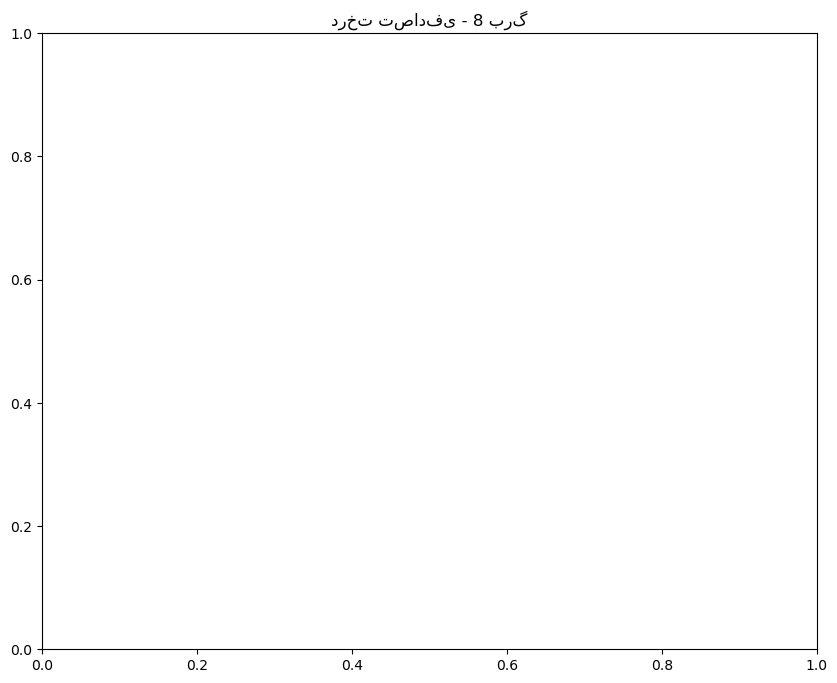

⚠️ toytree | draw_toytree:get_tree_style_updated_by_draw_args | Unrecognized arguments skipped: ['ax'].
Check the docs, argument names may have changed.
⚠️ toytree | draw_toytree:get_tree_style_updated_by_draw_args | Unrecognized arguments skipped: ['ax'].
Check the docs, argument names may have changed.
⚠️ toytree | draw_toytree:get_tree_style_updated_by_draw_args | Unrecognized arguments skipped: ['ax'].
Check the docs, argument names may have changed.



📊 آنالیز درخت:
   تعداد گره‌ها: 15
   تعداد برگ‌ها: 8
خطا در آنالیز درخت: 'ToyTree' object has no attribute 'treeheight'

🧪 تست ۴: مقایسه Layout ها

🔄 مقایسه Layout های مختلف برای درخت:
  Layout: r
  Layout: d
  Layout: c


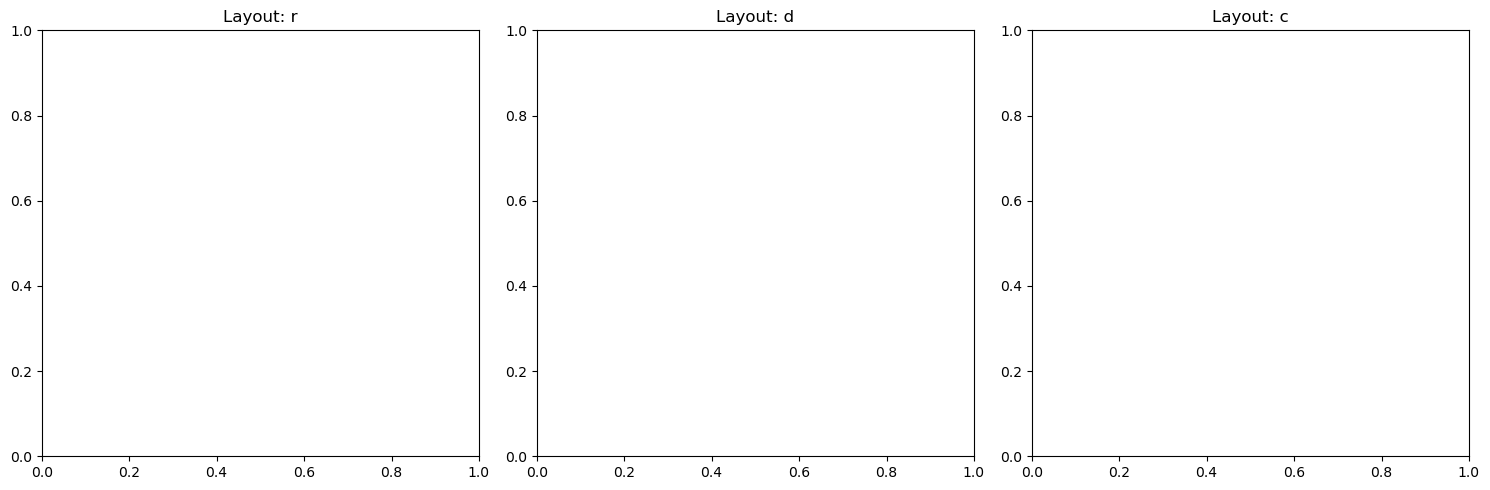

⚠️ toytree | draw_toytree:get_tree_style_updated_by_draw_args | Unrecognized arguments skipped: ['ax'].
Check the docs, argument names may have changed.
⚠️ toytree | draw_toytree:get_tree_style_updated_by_draw_args | Unrecognized arguments skipped: ['ax'].
Check the docs, argument names may have changed.
⚠️ toytree | draw_toytree:get_tree_style_updated_by_draw_args | Unrecognized arguments skipped: ['ax'].
Check the docs, argument names may have changed.



🧪 تست ۵: مقایسه درختان مختلف

نمایش درخت ساده
درخت ساده ایجاد شد:
  - تعداد برگ‌ها: 2
خطا در نمایش ساده درخت: 'ToyTree' object has no attribute 'treeheight'

نمایش درخت پریمات‌ها
درخت ساده ایجاد شد:
  - تعداد برگ‌ها: 5
خطا در نمایش ساده درخت: 'ToyTree' object has no attribute 'treeheight'

نمایش درخت پستانداران
درخت ساده ایجاد شد:
  - تعداد برگ‌ها: 7
خطا در نمایش ساده درخت: 'ToyTree' object has no attribute 'treeheight'

✅ تمام تست‌ها انجام شد!

🔬 توابع پیشرفته:


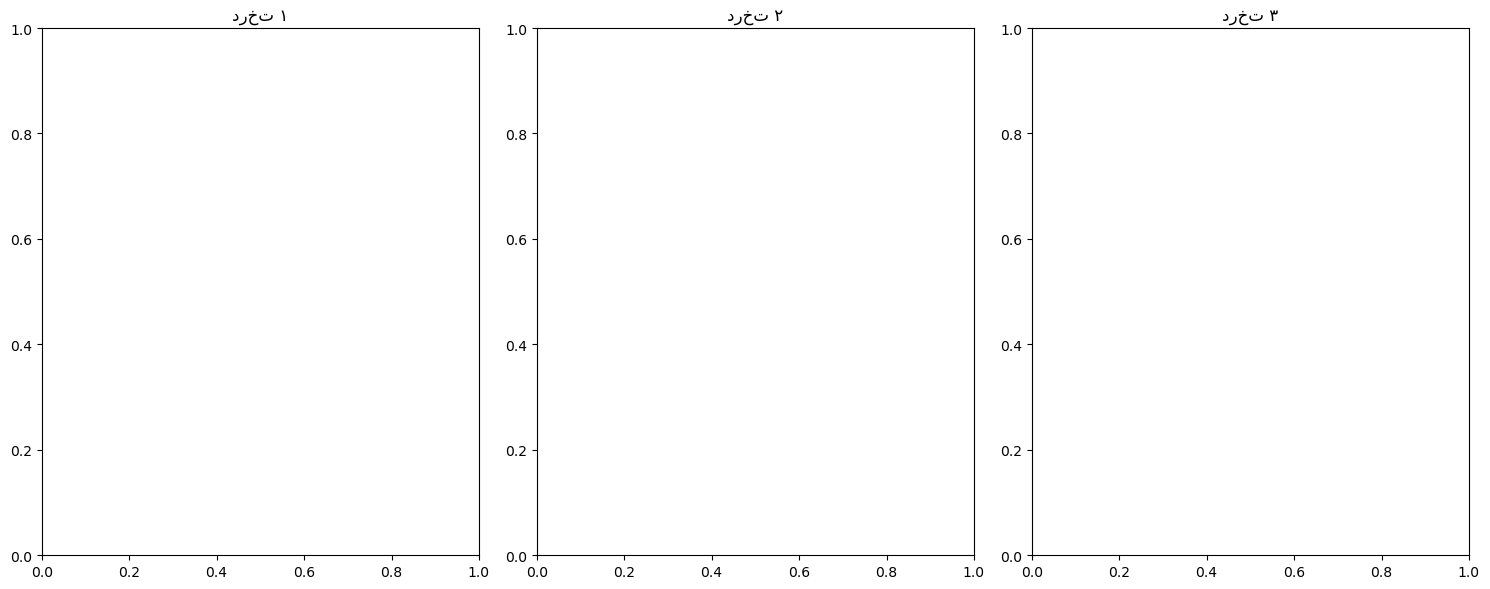


🖥️ اطلاعات سیستم:
  Python: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
  Matplotlib: 3.10.0
  NumPy: 1.26.4


<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t3a875958243942d692f6ab78ce5886cf"> r0 r1 r2 r3 r4 r5 r6 r7

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t2ffe81a8b0da41de8fc89a9e2175db6c"> A B C D

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t2f71e55898634ea9b49995bac53c151b"> A B C D

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t8d1c19c326f34cb998efb844d10d6431"> A B C

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t0b4031ced0fd4e26a422556dfd98573b"> D E F G

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tab5a1301fdc8411fad1f31c067c4edf0"> H I J K

In [65]:
import toytree
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from io import StringIO

def visualize_tree(newick_string: str, output_file: str = None, **kwargs):
    """
    نمایش زیبای درخت فیلوژنی با toytree و matplotlib
    """
    try:
        # ایجاد درخت از رشته Newick
        tree = toytree.tree(newick_string)
        
        # تنظیمات پیش‌فرض
        width = kwargs.get('width', 8)
        height = kwargs.get('height', 6)
        node_size = kwargs.get('node_size', 50)
        node_color = kwargs.get('node_color', "lightblue")
        tip_labels = kwargs.get('tip_labels', True)
        layout = kwargs.get('layout', 'r')  # 'r' برای radial، 'd' برای rectangular
        
        print(f"درخت با موفقیت ایجاد شد:")
        print(f"  - تعداد برگ‌ها: {tree.ntips}")
        print(f"  - ارتفاع درخت: {tree.treeheight:.2f}")
        
        # ایجاد figure با matplotlib
        fig, ax = plt.subplots(1, 1, figsize=(width, height))
        
        # رسم درخت
        canvas, axes, mark = tree.draw(
            ax=ax,
            layout=layout,
            node_labels=tip_labels,
            node_sizes=node_size,
            node_colors=node_color,
            tip_labels_align=True,
            tip_labels_colors="darkblue",
        )
        
        plt.title(f"درخت فیلوژنی (تعداد برگ‌ها: {tree.ntips})")
        
        # ذخیره در صورت نیاز
        if output_file:
            try:
                plt.savefig(output_file, dpi=300, bbox_inches='tight')
                print(f"درخت در '{output_file}' ذخیره شد.")
            except Exception as save_error:
                print(f"خطا در ذخیره فایل: {save_error}")
        
        plt.show()
        return fig, tree
        
    except Exception as e:
        print(f"خطا در نمایش درخت: {e}")
        import traceback
        print(f"جزئیات خطا: {traceback.format_exc()}")
        return None, None

def visualize_tree_simple(newick_string: str, output_file: str = None):
    """
    نمایش ساده درخت بدون پارامترهای پیچیده
    """
    try:
        tree = toytree.tree(newick_string)
        
        print(f"درخت ساده ایجاد شد:")
        print(f"  - تعداد برگ‌ها: {tree.ntips}")
        print(f"  - ارتفاع درخت: {tree.treeheight:.2f}")
        
        # رسم ساده درخت
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        canvas, axes, mark = tree.draw(ax=ax)
        
        plt.title(f"درخت فیلوژنی - {tree.ntips} گونه")
        
        if output_file:
            plt.savefig(output_file, dpi=300, bbox_inches='tight')
            print(f"ذخیره شد: {output_file}")
        
        plt.show()
        return fig, tree
        
    except Exception as e:
        print(f"خطا در نمایش ساده درخت: {e}")
        return None, None

# تست با داده‌های مختلف
def test_different_trees():
    """تست با درختان مختلف"""
    
    # درخت ساده
    simple_tree = "(A:1.0,B:1.0);"
    
    # درخت پیچیده‌تر
    complex_tree = "((Human:0.1,Chimp:0.1):0.2,(Gorilla:0.15,(Orangutan:0.2,Gibbon:0.25):0.1):0.05);"
    
    # درخت با گونه‌های بیشتر
    multi_species_tree = "(((Human:0.05,Chimp:0.05):0.1,Gorilla:0.15):0.1,((Mouse:0.3,Rat:0.25):0.2,(Cow:0.4,Dog:0.35):0.15):0.05);"
    
    trees = {
        "درخت ساده": simple_tree,
        "درخت پریمات‌ها": complex_tree,
        "درخت پستانداران": multi_species_tree
    }
    
    for name, newick_str in trees.items():
        print(f"\n{'='*50}")
        print(f"نمایش {name}")
        print(f"{'='*50}")
        visualize_tree_simple(newick_str, f"{name.replace(' ', '_')}.png")

# ایجاد درخت تصادفی برای تست
def create_random_tree(n_tips=8, tree_height=1.0):
    """ایجاد درخت تصادفی برای تست"""
    try:
        tree = toytree.rtree.unittree(ntips=n_tips, treeheight=tree_height)
        return tree
    except Exception as e:
        print(f"خطا در ایجاد درخت تصادفی: {e}")
        # ایجاد درخت ساده به عنوان جایگزین
        return toytree.tree("(A:1,B:1,C:1,D:1);")

def visualize_random_tree(n_tips=10):
    """نمایش درخت تصادفی"""
    try:
        tree = create_random_tree(n_tips)
        
        print(f"درخت تصادفی با {n_tips} برگ ایجاد شد")
        
        # رسم ساده
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        canvas, axes, mark = tree.draw(ax=ax)
        
        plt.title(f"درخت تصادفی - {n_tips} برگ")
        plt.show()
        
        return fig, tree
        
    except Exception as e:
        print(f"خطا در ایجاد درخت تصادفی: {e}")
        return None, None

# آنالیز درخت
def analyze_tree(tree):
    """آنالیز و نمایش اطلاعات درخت"""
    if tree is None:
        print("درخت معتبری برای آنالیز وجود ندارد")
        return
    
    try:
        print(f"\n📊 آنالیز درخت:")
        print(f"   تعداد گره‌ها: {tree.nnodes}")
        print(f"   تعداد برگ‌ها: {tree.ntips}")
        print(f"   ارتفاع درخت: {tree.treeheight:.3f}")
        
        # محاسبه عمق درخت
        def calculate_max_depth(node):
            if node.is_leaf():
                return 0
            return max(calculate_max_depth(child) for child in node.children) + 1
        
        try:
            max_depth = calculate_max_depth(tree.treenode)
            print(f"   حداکثر عمق: {max_depth}")
        except:
            print(f"   حداکثر عمق: محاسبه نشد")
        
        # محاسبه فاصله بین برگ‌ها
        if tree.ntips > 1:
            try:
                # استفاده از متریک ساده‌تر
                print(f"   فاصله ریشه تا دورترین برگ: {tree.treeheight:.3f}")
            except Exception as dist_error:
                print(f"   خطا در محاسبه فواصل: {dist_error}")
        
    except Exception as e:
        print(f"خطا در آنالیز درخت: {e}")

def compare_tree_layouts(newick_string: str):
    """
    مقایسه انواع مختلف Layout برای درخت
    """
    tree = toytree.tree(newick_string)
    layouts = ['r', 'd', 'c']  # radial, rectangular, circular
    
    print(f"\n🔄 مقایسه Layout های مختلف برای درخت:")
    
    fig, axes = plt.subplots(1, len(layouts), figsize=(15, 5))
    
    for i, layout in enumerate(layouts):
        try:
            print(f"  Layout: {layout}")
            
            if len(layouts) > 1:
                ax = axes[i]
            else:
                ax = axes
                
            tree.draw(ax=ax, layout=layout)
            ax.set_title(f"Layout: {layout}")
            
        except Exception as e:
            print(f"  ❌ خطا در layout {layout}: {e}")
    
    plt.tight_layout()
    plt.show()

# اجرای اصلی
if __name__ == "__main__":
    print("📈 کتابخانه نمایش درخت فیلوژنی (با matplotlib)")
    print("=" * 60)
    
    # بررسی نسخه toytree
    print(f"نسخه toytree: {toytree.__version__}")
    
    # تست ۱: درخت ساده
    print("\n🧪 تست ۱: درخت ساده")
    newick_str = "(A:1.0,(B:0.8,(C:0.5,D:0.5):0.3):0.2);"
    fig, tree = visualize_tree_simple(newick_str, "simple_tree.png")
    if tree:
        analyze_tree(tree)
    
    # تست ۲: درخت پیچیده‌تر
    print("\n🧪 تست ۲: درخت پریمات‌ها")
    primate_tree = "((Human:0.05,Chimp:0.05):0.02,Gorilla:0.08,Orangutan:0.1);"
    fig, tree = visualize_tree_simple(primate_tree, "primate_tree.png")
    if tree:
        analyze_tree(tree)
    
    # تست ۳: درخت تصادفی
    print("\n🧪 تست ۳: درخت تصادفی")
    fig, random_tree = visualize_random_tree(8)
    if random_tree:
        analyze_tree(random_tree)
    
    # تست ۴: مقایسه Layout ها
    print("\n🧪 تست ۴: مقایسه Layout ها")
    test_tree = "((A:1,B:1):0.5,(C:1,D:1):0.5);"
    compare_tree_layouts(test_tree)
    
    # تست ۵: چندین درخت مختلف
    print("\n🧪 تست ۵: مقایسه درختان مختلف")
    test_different_trees()
    
    print("\n✅ تمام تست‌ها انجام شد!")

# توابع کمکی پیشرفته
def plot_multiple_trees(tree_list, titles=None):
    """
    نمایش چندین درخت در کنار هم
    """
    n_trees = len(tree_list)
    fig, axes = plt.subplots(1, n_trees, figsize=(5*n_trees, 6))
    
    if n_trees == 1:
        axes = [axes]
    
    for i, (tree, ax) in enumerate(zip(tree_list, axes)):
        tree.draw(ax=ax)
        if titles and i < len(titles):
            ax.set_title(titles[i])
        else:
            ax.set_title(f"درخت {i+1}")
    
    plt.tight_layout()
    plt.show()

def create_tree_from_distance_matrix(distances, names):
    """
    ایجاد درخت از ماتریس فاصله (ساده شده)
    """
    try:
        # این یک پیاده‌سازی ساده است
        # در واقعیت باید از الگوریتم‌هایی مثل UPGMA یا NJ استفاده کنید
        simple_newick = "("
        for i, name in enumerate(names):
            if i > 0:
                simple_newick += ","
            simple_newick += f"{name}:0.1"
        simple_newick += ");"
        
        return toytree.tree(simple_newick)
    except Exception as e:
        print(f"خطا در ایجاد درخت از ماتریس فاصله: {e}")
        return None

# مثال استفاده از توابع پیشرفته
print("\n🔬 توابع پیشرفته:")
# ایجاد چند درخت نمونه
tree1 = toytree.tree("((A:1,B:1):0.5,C:1.5);")
tree2 = toytree.tree("((D:1,E:1,F:1):0.5,G:1.5);")
tree3 = toytree.tree("(H:1,I:1,J:1,K:1);")

plot_multiple_trees([tree1, tree2, tree3], 
                   ["درخت ۱", "درخت ۲", "درخت ۳"])

# نمایش اطلاعات سیستم
print(f"\n🖥️ اطلاعات سیستم:")
print(f"  Python: {sys.version}")
print(f"  Matplotlib: {matplotlib.__version__}")
print(f"  NumPy: {np.__version__}")